# Problem 1 — One-Dimensional Bin Packing for E-commerce Fulfillment Using Ant Colony Optimization (ACO)



########## FILE: Binpacks/binpack2.txt ##########

=== Running instance: u250_00  (n_items=250, capacity=150) ===
FFD baseline bins = 100
[Iter 50/200] iter-best bins=100, global-best bins=100, alpha=0.75, rho=0.238
[Iter 100/200] iter-best bins=100, global-best bins=100, alpha=1.00, rho=0.176
[Iter 150/200] iter-best bins=100, global-best bins=100, alpha=1.25, rho=0.113
[Iter 200/200] iter-best bins=100, global-best bins=100, alpha=1.50, rho=0.050
ACO best bins = 100, unused capacity = 217
Runtime = 12.37s


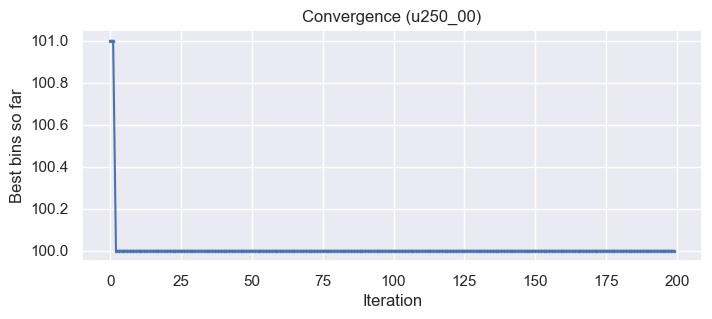

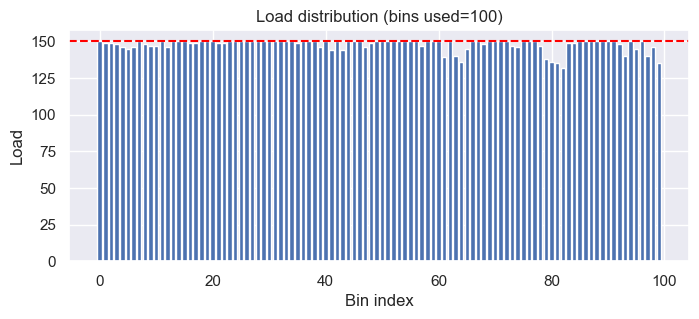


=== Running instance: u250_01  (n_items=250, capacity=150) ===
FFD baseline bins = 101
[Iter 50/200] iter-best bins=101, global-best bins=101, alpha=0.75, rho=0.238
[Iter 100/200] iter-best bins=101, global-best bins=101, alpha=1.00, rho=0.176
[Iter 150/200] iter-best bins=101, global-best bins=101, alpha=1.25, rho=0.113
[Iter 200/200] iter-best bins=101, global-best bins=101, alpha=1.50, rho=0.050
ACO best bins = 101, unused capacity = 296
Runtime = 12.61s


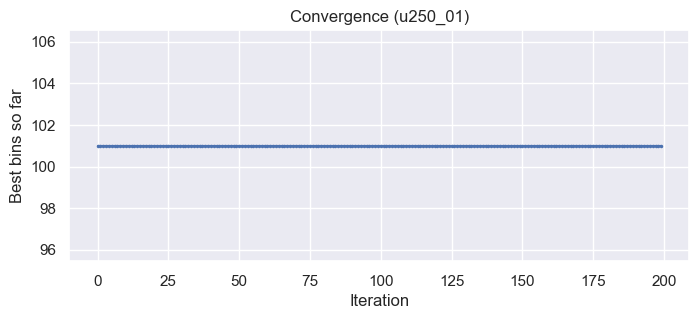

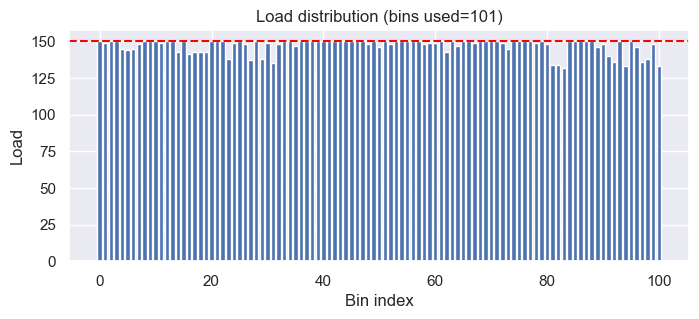


=== Running instance: u250_02  (n_items=250, capacity=150) ===
FFD baseline bins = 104
[Iter 50/200] iter-best bins=103, global-best bins=103, alpha=0.75, rho=0.238
[Iter 100/200] iter-best bins=103, global-best bins=103, alpha=1.00, rho=0.176
[Iter 150/200] iter-best bins=103, global-best bins=103, alpha=1.25, rho=0.113
[Iter 200/200] iter-best bins=103, global-best bins=103, alpha=1.50, rho=0.050
ACO best bins = 103, unused capacity = 237
Runtime = 14.03s


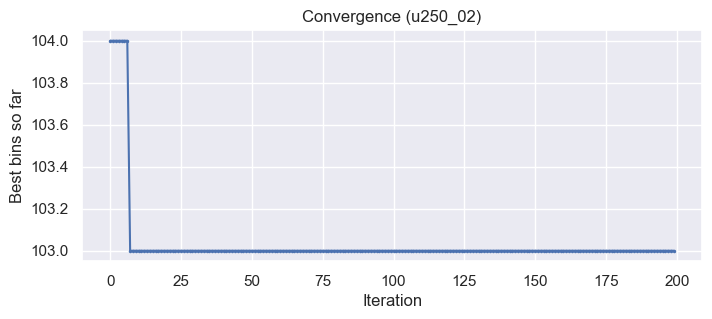

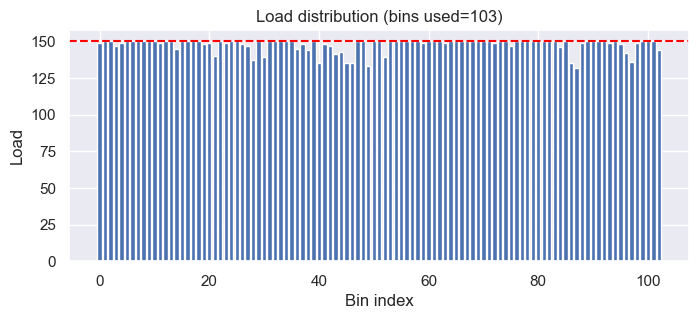


=== Running instance: u250_03  (n_items=250, capacity=150) ===
FFD baseline bins = 101
[Iter 50/200] iter-best bins=101, global-best bins=101, alpha=0.75, rho=0.238
[Iter 100/200] iter-best bins=101, global-best bins=101, alpha=1.00, rho=0.176
[Iter 150/200] iter-best bins=101, global-best bins=101, alpha=1.25, rho=0.113
[Iter 200/200] iter-best bins=101, global-best bins=101, alpha=1.50, rho=0.050
ACO best bins = 101, unused capacity = 236
Runtime = 12.95s


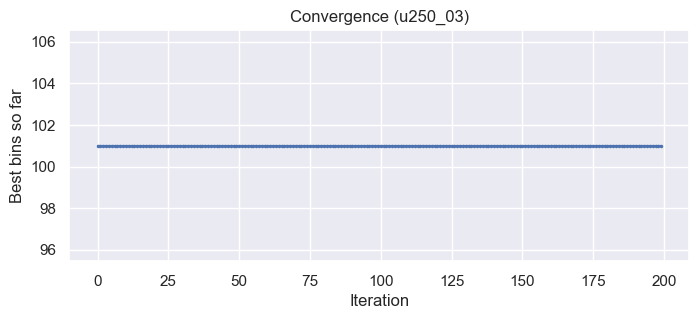

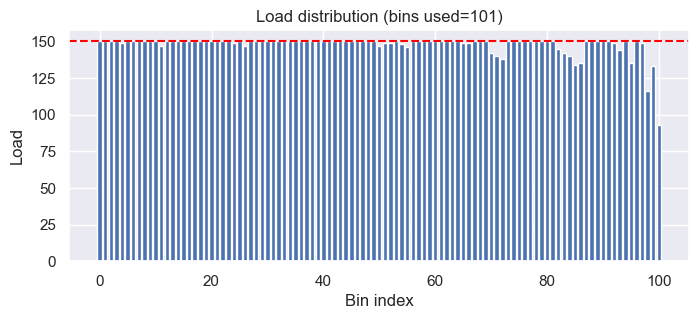


=== Running instance: u250_04  (n_items=250, capacity=150) ===
FFD baseline bins = 102
[Iter 50/200] iter-best bins=102, global-best bins=102, alpha=0.75, rho=0.238
[Iter 100/200] iter-best bins=102, global-best bins=102, alpha=1.00, rho=0.176
[Iter 150/200] iter-best bins=102, global-best bins=102, alpha=1.25, rho=0.113
[Iter 200/200] iter-best bins=102, global-best bins=102, alpha=1.50, rho=0.050
ACO best bins = 102, unused capacity = 208
Runtime = 12.78s


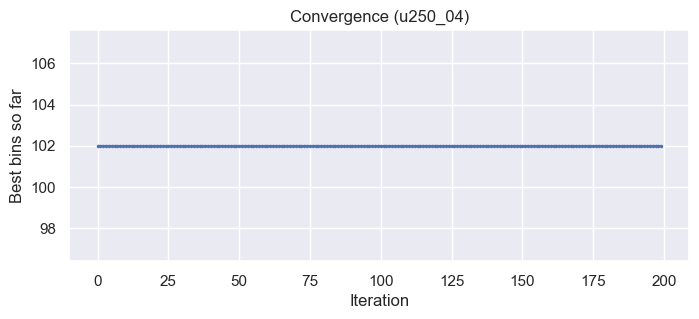

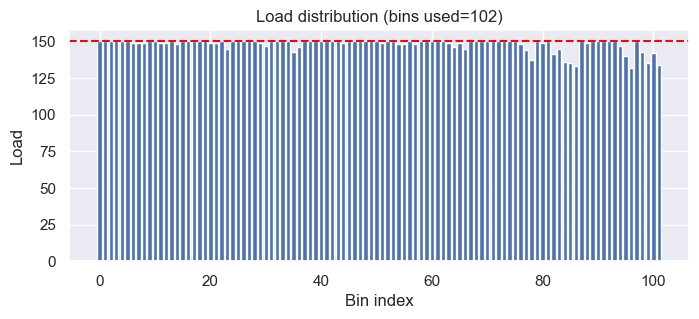


=== Running instance: u250_05  (n_items=250, capacity=150) ===
FFD baseline bins = 104
[Iter 50/200] iter-best bins=103, global-best bins=103, alpha=0.75, rho=0.238
[Iter 100/200] iter-best bins=103, global-best bins=103, alpha=1.00, rho=0.176
[Iter 150/200] iter-best bins=103, global-best bins=103, alpha=1.25, rho=0.113
[Iter 200/200] iter-best bins=103, global-best bins=103, alpha=1.50, rho=0.050
ACO best bins = 103, unused capacity = 326
Runtime = 14.69s


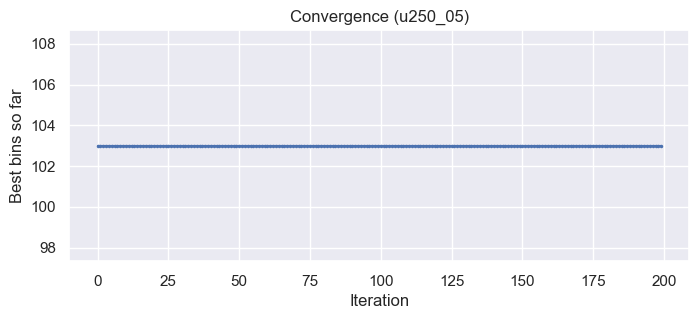

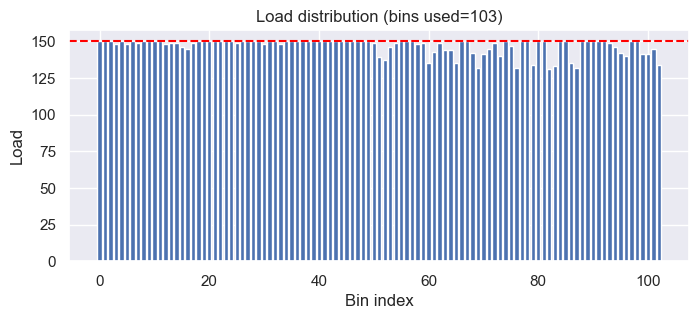


=== Running instance: u250_06  (n_items=250, capacity=150) ===
FFD baseline bins = 103
[Iter 50/200] iter-best bins=103, global-best bins=103, alpha=0.75, rho=0.238
[Iter 100/200] iter-best bins=103, global-best bins=103, alpha=1.00, rho=0.176
[Iter 150/200] iter-best bins=103, global-best bins=103, alpha=1.25, rho=0.113
[Iter 200/200] iter-best bins=103, global-best bins=103, alpha=1.50, rho=0.050
ACO best bins = 103, unused capacity = 296
Runtime = 13.40s


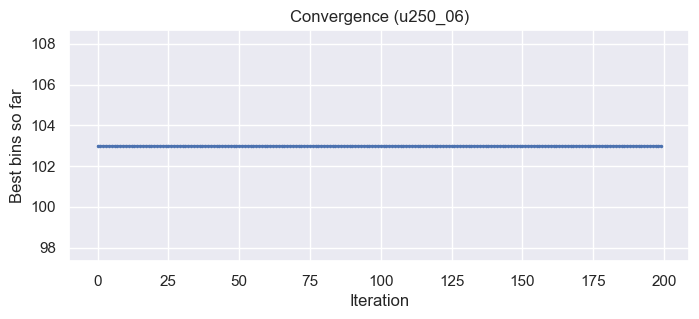

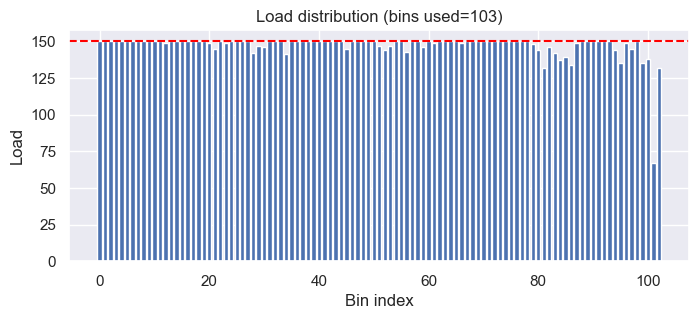


=== Running instance: u250_07  (n_items=250, capacity=150) ===
FFD baseline bins = 105
[Iter 50/200] iter-best bins=105, global-best bins=105, alpha=0.75, rho=0.238
[Iter 100/200] iter-best bins=105, global-best bins=105, alpha=1.00, rho=0.176
[Iter 150/200] iter-best bins=105, global-best bins=105, alpha=1.25, rho=0.113
[Iter 200/200] iter-best bins=105, global-best bins=105, alpha=1.50, rho=0.050
ACO best bins = 105, unused capacity = 332
Runtime = 12.80s


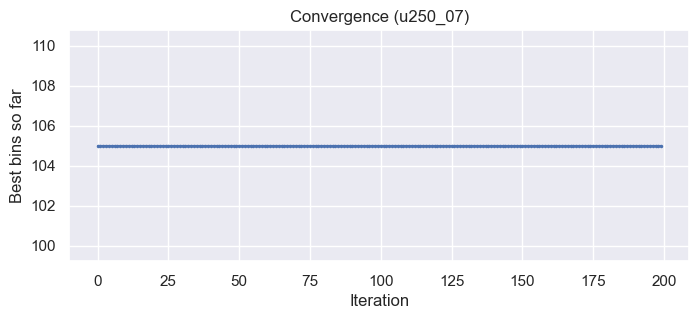

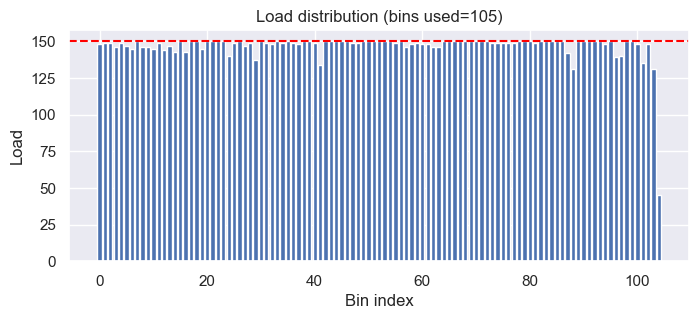

In [1]:
# --- Imports & Small utilities ---
import math
import random
import time
from collections import defaultdict, Counter
from typing import List, Tuple

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

# --- Config / Hyperparameters ---
CONFIG = {
    "alpha_start": 0.5,
    "alpha_end": 1.5,
    "beta": 2.0,
    "rho_start": 0.3,
    "rho_end": 0.05,
    "Q": 1.0,
    "n_ants": 30,
    "iterations": 200,
    "seed": 42,
    "use_first_fit_decreasing_init": True,
    "max_bins_scale": 1.0,
    "print_every": 50,   # CHANGED from 10 → 50
    "verbose": True,
    "tau_min": 0.01,
}

random.seed(CONFIG["seed"])
np.random.seed(CONFIG["seed"])

# --- Parser for OR-Library `binpack` files ---
def parse_orlib_binpack_file(text: str):
    tokens = text.split()
    idx = 0
    P = int(tokens[idx])
    idx += 1
    instances = []
    for _ in range(P):
        name = tokens[idx]
        idx += 1
        capacity = int(tokens[idx])
        idx += 1
        n_items = int(tokens[idx])
        idx += 1
        _best_known = tokens[idx]
        idx += 1
        items = []
        for i in range(n_items):
            items.append(int(tokens[idx]))
            idx += 1
        instances.append((name, capacity, items))
    return instances

# --- Baseline heuristic: First-Fit Decreasing (FFD) ---
def first_fit_decreasing(items: List[int], capacity: int) -> Tuple[int, List[List[int]]]:
    items_sorted = sorted(items, reverse=True)
    bins = []
    bin_caps = []
    for w in items_sorted:
        placed = False
        for i, rem in enumerate(bin_caps):
            if rem >= w:
                bins[i].append(w)
                bin_caps[i] -= w
                placed = True
                break
        if not placed:
            bins.append([w])
            bin_caps.append(capacity - w)
    return len(bins), bins

# --- ACOBinPacking class with adaptive parameters and better initialization ---
class ACOBinPacking:
    def __init__(self, items: List[int], capacity: int, config: dict):
        self.items = list(items)
        self.capacity = capacity
        self.n = len(items)
        self.config = config.copy()
        self.max_bins = max(1, int(self.n * max(1.0, config.get("max_bins_scale", 1.0))))
        self.item_order = sorted(range(self.n), key=lambda i: -self.items[i])
        tau_init = max(self.config.get("tau_min", 0.01), 0.01)
        self.tau = np.ones((self.n, self.max_bins)) * tau_init
        # parameters for adaptation during run
        self.alpha_start = self.config.get("alpha_start", 1.0)
        self.alpha_end = self.config.get("alpha_end", 1.0)
        self.beta = self.config.get("beta", 2.0)
        self.rho_start = self.config.get("rho_start", 0.1)
        self.rho_end = self.config.get("rho_end", 0.1)
        self.Q = self.config.get("Q", 1.0)

    def construct_solution(self, ant_seed=None):
        if ant_seed is not None:
            rand = random.Random(ant_seed)
        else:
            rand = random

        assignments = [-1] * self.n
        bins_loads = []
        bins_items = []

        for item_pos in self.item_order:
            w = self.items[item_pos]
            feasible_bins = []
            heuristics = []
            taus = []

            for b_idx, load in enumerate(bins_loads):
                rem = self.capacity - load
                if rem >= w:
                    remaining_after = rem - w
                    eta = 1.0 / (1.0 + remaining_after)
                    feasible_bins.append(b_idx)
                    heuristics.append(eta)
                    taus.append(self.tau[item_pos, b_idx])

            if len(bins_loads) < self.max_bins:
                remaining_after = self.capacity - w
                eta_new = 1.0 / (1.0 + remaining_after)
                new_slot_idx = len(bins_loads)
                feasible_bins.append(new_slot_idx)
                heuristics.append(eta_new)
                taus.append(self.tau[item_pos, new_slot_idx])

            if not feasible_bins:
                new_slot_idx = len(bins_loads)
                feasible_bins.append(new_slot_idx)
                heuristics.append(1.0 / (1.0 + (self.capacity - w)))
                taus.append(self.tau[item_pos, new_slot_idx] if new_slot_idx < self.max_bins else 0.1)

            tau_arr = np.array(taus) ** self.alpha
            eta_arr = np.array(heuristics) ** self.beta
            probs = tau_arr * eta_arr
            if probs.sum() == 0:
                probs = np.ones_like(probs)
            probs = probs / probs.sum()

            choice_idx = rand.choices(range(len(feasible_bins)), weights=probs, k=1)[0]
            chosen_bin = feasible_bins[choice_idx]

            if chosen_bin == len(bins_loads):
                bins_loads.append(w)
                bins_items.append([self.items[item_pos]])
            else:
                bins_loads[chosen_bin] += w
                bins_items[chosen_bin].append(self.items[item_pos])

            assignments[item_pos] = chosen_bin

        bins_used = len(bins_loads)
        total_unused = sum(self.capacity - load for load in bins_loads)
        return assignments, bins_items, bins_used, total_unused

    def local_repair_try_free_bin(self, bins_items: List[List[int]]) -> Tuple[List[List[int]], int]:
        bins = [list(b) for b in bins_items]
        loads = [sum(b) for b in bins]
        changed = True
        while changed:
            changed = False
            for i in range(len(bins)):
                if not bins[i]:
                    continue
                items_i = bins[i][:]
                can_move_all = True
                for w in items_i:
                    moved = False
                    for j in range(len(bins)):
                        if j == i:
                            continue
                        if sum(bins[j]) + w <= self.capacity:
                            bins[j].append(w)
                            bins[i].remove(w)
                            moved = True
                            break
                    if not moved:
                        can_move_all = False
                        break
                if can_move_all and len(bins[i]) == 0:
                    changed = True
                    bins.pop(i)
                    break
                else:
                    bins = [list(b) for b in bins_items]
                    break
        new_bins = [b for b in bins if b]
        return new_bins, len(new_bins)

    def run(self, n_ants: int, iterations: int, local_repair: bool=True, verbose: bool=False):
        best_solution = None
        best_history = []
        start_time = time.time()

        for it in range(1, iterations+1):
            # Adaptive alpha and rho (linear interpolation)
            self.alpha = self.alpha_start + (self.alpha_end - self.alpha_start) * (it - 1) / (iterations - 1)
            self.rho = self.rho_start + (self.rho_end - self.rho_start) * (it - 1) / (iterations - 1)

            ant_solutions = []
            for a in range(n_ants):
                seed = random.randint(0, 10**9)
                assign, bins_items, bins_used, total_unused = self.construct_solution(ant_seed=seed)
                if local_repair:
                    improved_bins, improved_used = self.local_repair_try_free_bin(bins_items)
                    if improved_used < bins_used:
                        bins_items = improved_bins
                        bins_used = improved_used
                        total_unused = sum(self.capacity - sum(b) for b in bins_items)
                ant_solutions.append((bins_used, total_unused, bins_items, assign))

            ant_solutions.sort(key=lambda x: (x[0], x[1]))
            best_ant = ant_solutions[0]
            b_used, b_unused, b_bins, b_assign = best_ant

            if (best_solution is None) or (b_used < best_solution[0]) or (b_used == best_solution[0] and b_unused < best_solution[1]):
                best_solution = (b_used, b_unused, b_bins, b_assign)

            best_history.append(best_solution[0])

            self.tau *= (1.0 - self.rho)

            for item_i, bin_j in enumerate(b_assign):
                if bin_j < self.max_bins:
                    self.tau[item_i, bin_j] += (self.Q / max(1, best_solution[0]))

            if verbose and (it % self.config.get("print_every", 10) == 0):
                print(f"[Iter {it}/{iterations}] iter-best bins={b_used}, global-best bins={best_solution[0]}, alpha={self.alpha:.2f}, rho={self.rho:.3f}")

        wall_time = time.time() - start_time
        return {
            "best_bins": best_solution[0],
            "best_unused": best_solution[1],
            "best_bins_items": best_solution[2],
            "best_assignments": best_solution[3],
            "history": best_history,
            "time_sec": wall_time
        }

# --- Experiment harness ---
def run_single_instance(name: str, items: List[int], capacity: int, config: dict):
    print(f"\n=== Running instance: {name}  (n_items={len(items)}, capacity={capacity}) ===")
    ffd_bins, ffd_bins_items = first_fit_decreasing(items, capacity)
    print(f"FFD baseline bins = {ffd_bins}")

    aco = ACOBinPacking(items, capacity, config)
    res = aco.run(n_ants=config["n_ants"], iterations=config["iterations"], local_repair=True, verbose=config.get("verbose", False))

    print(f"ACO best bins = {res['best_bins']}, unused capacity = {res['best_unused']}")
    print(f"Runtime = {res['time_sec']:.2f}s")

    plt.figure(figsize=(8,3))
    plt.plot(res["history"], marker=".", markersize=3)
    plt.xlabel("Iteration")
    plt.ylabel("Best bins so far")
    plt.title(f"Convergence ({name})")
    plt.show()

    bins_items = res["best_bins_items"]
    loads = [sum(b) for b in bins_items]
    plt.figure(figsize=(8,3))
    plt.bar(range(len(loads)), loads)
    plt.axhline(capacity, color='red', linestyle='--')
    plt.xlabel("Bin index")
    plt.ylabel("Load")
    plt.title(f"Load distribution (bins used={res['best_bins']})")
    plt.show()

    return res

# --- MAIN RUN ---
if __name__ == "__main__":
    filename = f"Binpacks/binpack2.txt"
    print(f"\n\n########## FILE: {filename} ##########")

    with open(filename, "r") as f:
        text = f.read()

    # Parse file
    instances = parse_orlib_binpack_file(text)

    # Run ONLY the first 3 instances in each file
    for name, capacity, items in instances[:8]:
        run_single_instance(name, items, capacity, CONFIG)

# Problem 2 — Optimize Classic Benchmark Functions using Particle Swarm Optimization (PSO)

Starting Problem 2 - PSO Optimization...
RUNNING PSO EXPERIMENTS (Dimensions: 2, 10, 30)

--- Testing Dimensions: n=2 ---
Sphere         : Best=3.2992e-102, Error=3.2992e-102
Rosenbrock     : Best=0.0000e+00, Error=0.0000e+00
Rastrigin      : Best=0.0000e+00, Error=0.0000e+00
Ackley         : Best=4.4409e-16, Error=4.4409e-16
Griewank       : Best=0.0000e+00, Error=0.0000e+00
Schwefel       : Best=1.1844e+02, Error=1.1844e+02

--- Testing Dimensions: n=10 ---
Sphere         : Best=2.2633e-58, Error=2.2633e-58
Rosenbrock     : Best=1.5575e-01, Error=1.5575e-01
Rastrigin      : Best=3.9798e+00, Error=3.9798e+00
Ackley         : Best=3.9968e-15, Error=3.9968e-15
Griewank       : Best=8.6065e-02, Error=8.6065e-02
Schwefel       : Best=8.1237e+02, Error=8.1237e+02

--- Testing Dimensions: n=30 ---
Sphere         : Best=2.6214e+01, Error=2.6214e+01
Rosenbrock     : Best=9.4885e+02, Error=9.4885e+02
Rastrigin      : Best=1.7326e+02, Error=1.7326e+02
Ackley         : Best=1.9710e+01, Error=1.9

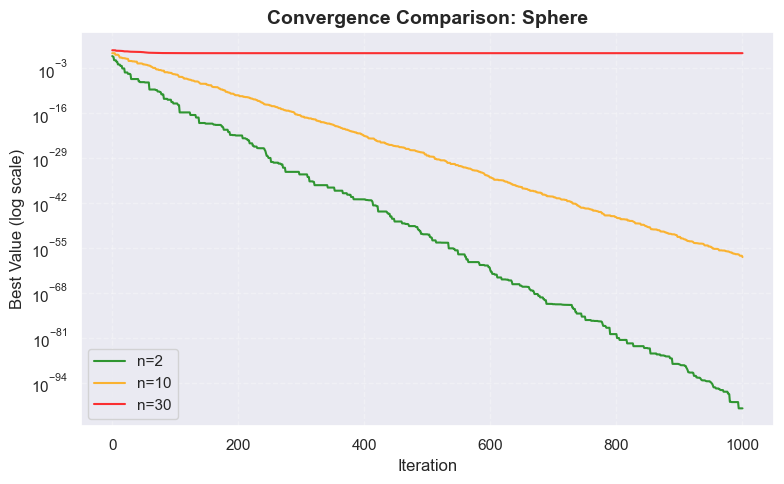

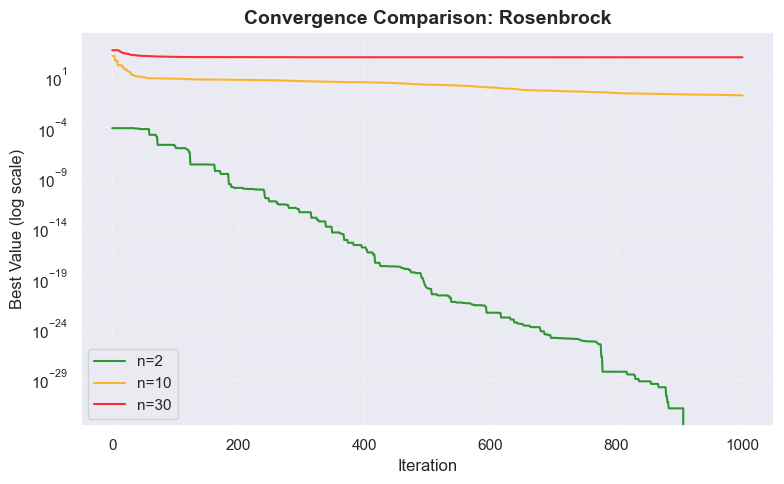

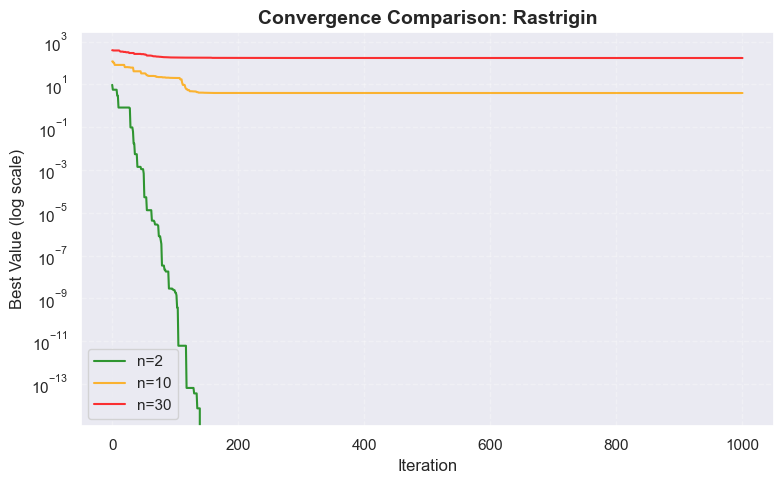

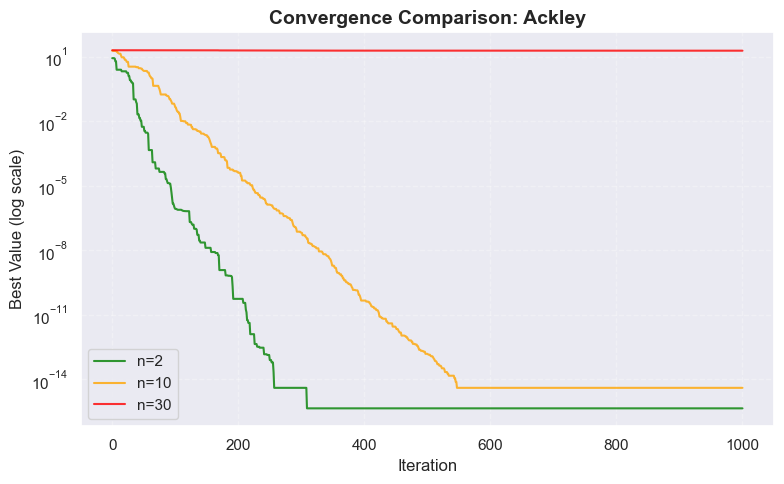

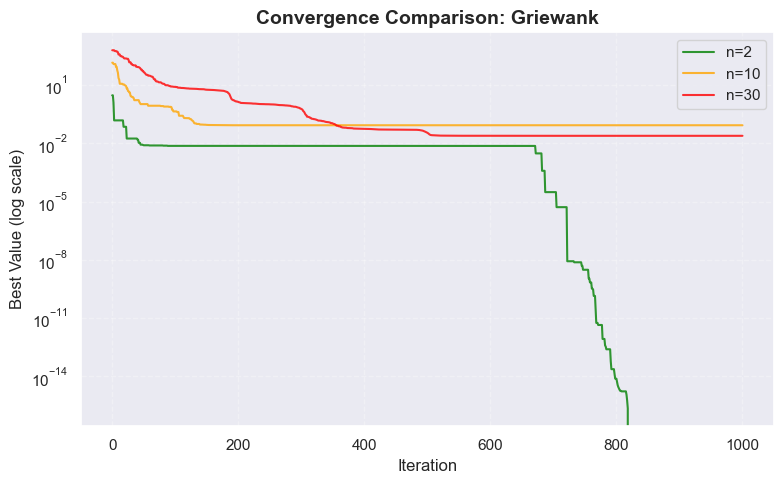

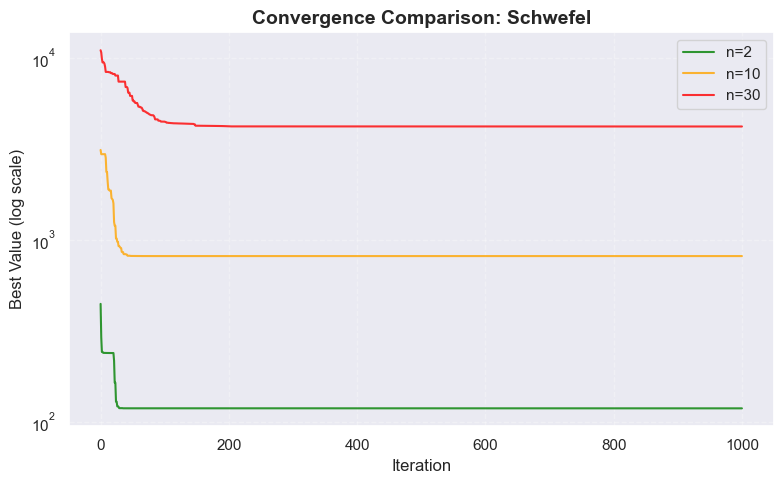


FINAL COMPARISON TABLE (Error vs Dimensions)


Dimension              2             10           30
Function                                            
Ackley       4.440892e-16  3.996803e-15    19.709510
Griewank     0.000000e+00  8.606524e-02     0.024590
Rastrigin    0.000000e+00  3.979836e+00   173.264041
Rosenbrock   0.000000e+00  1.557469e-01   948.849720
Schwefel     1.184384e+02  8.123656e+02  4181.785793
Sphere      3.299241e-102  2.263328e-58    26.214400

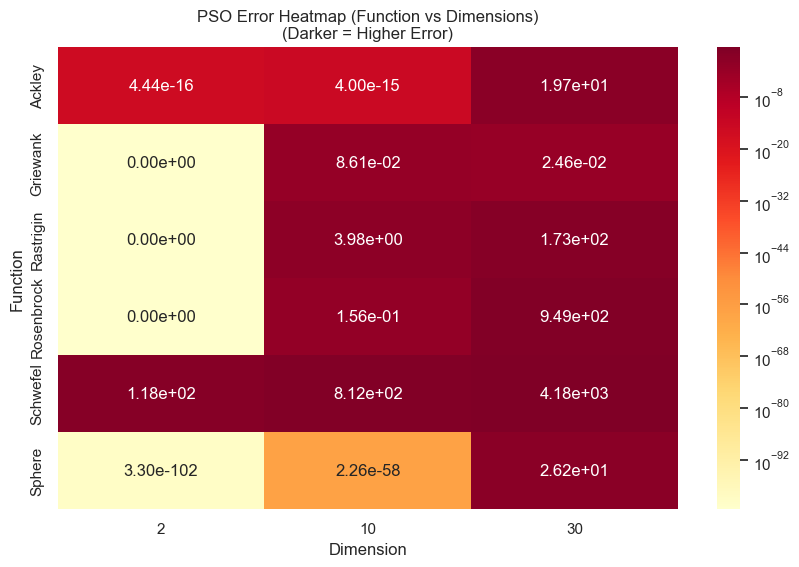

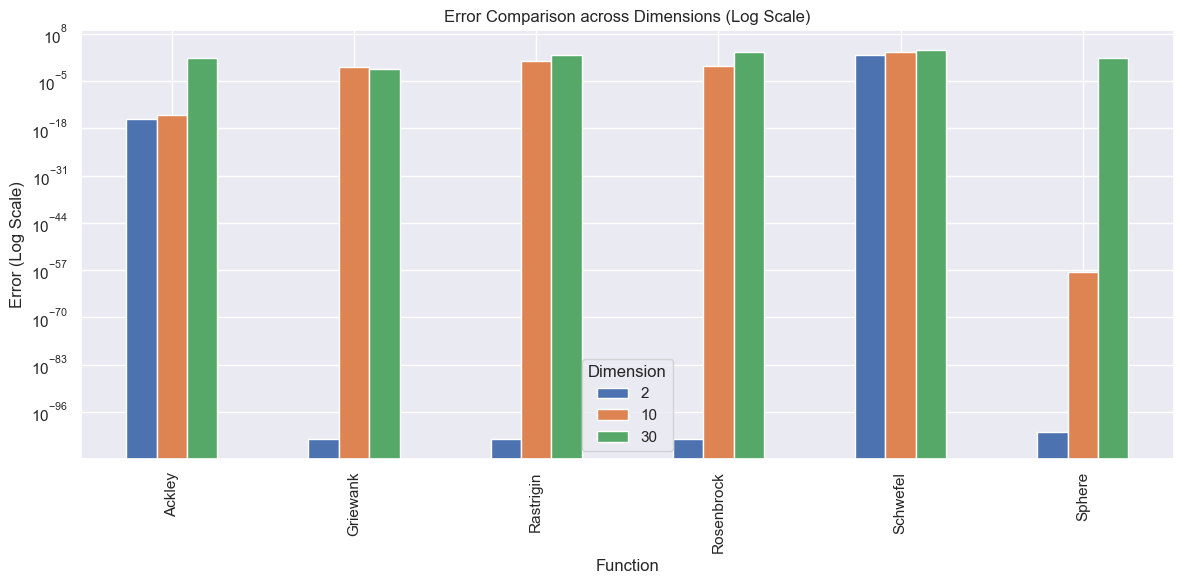


EXTENSION 1: PARAMETER STUDY
Comparing different parameter sets on Rastrigin (30D)

Running Set A (Standard): {'w': 0.7, 'c1': 1.5, 'c2': 1.5}
  > Final Error: 9.1607e+01

Running Set B (High Exploration): {'w': 0.9, 'c1': 2.0, 'c2': 2.0}
  > Final Error: 4.1599e+02

Running Set C (High Exploitation): {'w': 0.4, 'c1': 2.0, 'c2': 2.0}
  > Final Error: 1.0149e+02

--- Parameter Study Results ---


Set    w   c1   c2       Error
0           Set A (Standard)  0.7  1.5  1.5   91.607028
1   Set B (High Exploration)  0.9  2.0  2.0  415.987964
2  Set C (High Exploitation)  0.4  2.0  2.0  101.485389


EXTENSION 2: TOPOLOGY COMPARISON
Comparing Global Best vs. Local Best (Ring Topology) on Rastrigin (30D)

Running Global Best Topology...
Running Local Best (Ring) Topology...

Results (Rastrigin 30D):
  Global Best Error: 1.1541e+02
  Local Best Error:  1.0925e+02


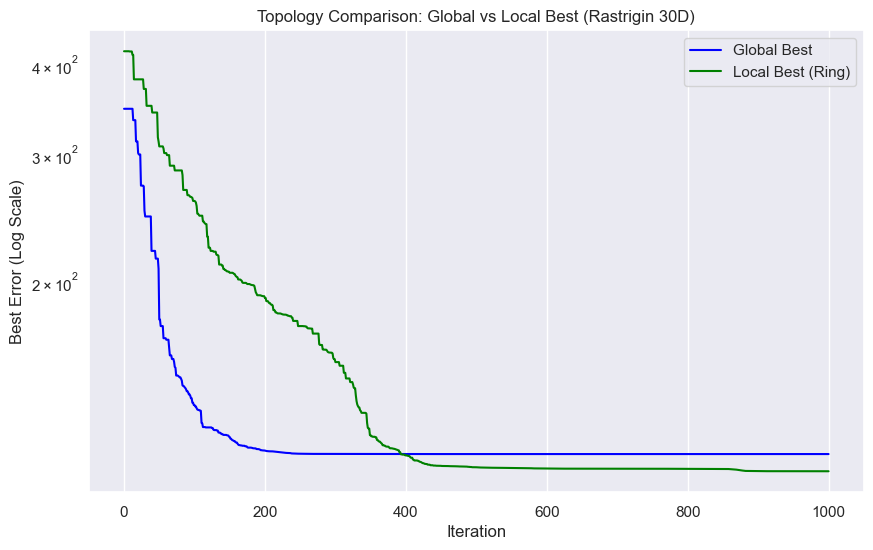

In [8]:
# --- Imports ---
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from typing import Callable, Tuple, List
import time

# Configure matplotlib for notebook display
plt.rcParams['figure.max_open_warning'] = 0

print("Starting Problem 2 - PSO Optimization...")
sns.set(style="darkgrid")

# --- Configuration ---
BASE_CONFIG = {
    "n_particles": 30,
    "max_iterations": 1000,
    "w": 0.7,
    "c1": 1.5,
    "c2": 1.5,
    "seed": 42,
    "verbose": False,
}

np.random.seed(BASE_CONFIG["seed"])

# --- Benchmark Functions ---
def sphere(x: np.ndarray) -> float:
    return np.sum(x**2)

def rosenbrock(x: np.ndarray) -> float:
    return np.sum(100.0 * (x[1:] - x[:-1]**2)**2 + (1 - x[:-1])**2)

def rastrigin(x: np.ndarray) -> float:
    A = 10
    n = len(x)
    return A * n + np.sum(x**2 - A * np.cos(2 * np.pi * x))

def ackley(x: np.ndarray) -> float:
    a = 20
    b = 0.2
    c = 2 * np.pi
    n = len(x)
    sum1 = np.sum(x**2)
    sum2 = np.sum(np.cos(c * x))
    return -a * np.exp(-b * np.sqrt(sum1 / n)) - np.exp(sum2 / n) + a + np.e

def griewank(x: np.ndarray) -> float:
    sum_sq = np.sum(x**2)
    prod = np.prod(np.cos(x / np.sqrt(np.arange(1, len(x) + 1))))
    return 1 + sum_sq / 4000 - prod

def schwefel(x: np.ndarray) -> float:
    n = len(x)
    return 418.9829 * n - np.sum(x * np.sin(np.sqrt(np.abs(x))))

def get_benchmark_functions(n_dim: int):
    return {
        "Sphere": { "func": sphere, "bounds": (-5.12, 5.12), "global_min": 0.0 },
        "Rosenbrock": { "func": rosenbrock, "bounds": (-2.048, 2.048), "global_min": 0.0 },
        "Rastrigin": { "func": rastrigin, "bounds": (-5.12, 5.12), "global_min": 0.0 },
        "Ackley": { "func": ackley, "bounds": (-32, 32), "global_min": 0.0 },
        "Griewank": { "func": griewank, "bounds": (-600, 600), "global_min": 0.0 },
        "Schwefel": { "func": schwefel, "bounds": (-500, 500), "global_min": 0.0 }
    }

# --- PSO Class ---
class ParticleSwarmOptimizer:
    def __init__(self, objective_func, bounds, n_particles, n_dimensions, w, c1, c2):
        self.objective_func = objective_func
        self.bounds = bounds
        self.n_particles = n_particles
        self.n_dimensions = n_dimensions
        self.w, self.c1, self.c2 = w, c1, c2
        
        self.positions = np.random.uniform(bounds[0], bounds[1], (n_particles, n_dimensions))
        self.velocities = np.random.uniform(-abs(bounds[1]-bounds[0]), abs(bounds[1]-bounds[0]), (n_particles, n_dimensions))
        
        self.personal_best_positions = self.positions.copy()
        self.personal_best_values = np.array([objective_func(p) for p in self.positions])
        
        self.global_best_idx = np.argmin(self.personal_best_values)
        self.global_best_position = self.personal_best_positions[self.global_best_idx].copy()
        self.global_best_value = self.personal_best_values[self.global_best_idx]
        self.history = [self.global_best_value]
    
    def update(self):
        r1 = np.random.rand(self.n_particles, self.n_dimensions)
        r2 = np.random.rand(self.n_particles, self.n_dimensions)
        cog = self.c1 * r1 * (self.personal_best_positions - self.positions)
        soc = self.c2 * r2 * (self.global_best_position - self.positions)
        self.velocities = self.w * self.velocities + cog + soc
        self.positions += self.velocities
        self.positions = np.clip(self.positions, self.bounds[0], self.bounds[1])
        
        vals = np.array([self.objective_func(p) for p in self.positions])
        better = vals < self.personal_best_values
        self.personal_best_positions[better] = self.positions[better]
        self.personal_best_values[better] = vals[better]
        
        best_idx = np.argmin(self.personal_best_values)
        if self.personal_best_values[best_idx] < self.global_best_value:
            self.global_best_value = self.personal_best_values[best_idx]
            self.global_best_position = self.personal_best_positions[best_idx].copy()
            self.global_best_idx = best_idx
        self.history.append(self.global_best_value)

    def optimize(self, iterations):
        start = time.time()
        for _ in range(iterations):
            self.update()
        return {
            "best_value": self.global_best_value, 
            "best_position": self.global_best_position,
            "history": self.history, 
            "time": time.time()-start
        }

# --- Main Execution ---
DIMENSIONS_TO_TEST = [2, 10, 30]
results_table = []
results_by_func = {}

print(f"{'='*80}")
print("RUNNING PSO EXPERIMENTS (Dimensions: 2, 10, 30)")
print(f"{'='*80}")

for n_dim in DIMENSIONS_TO_TEST:
    print(f"\n--- Testing Dimensions: n={n_dim} ---")
    funcs = get_benchmark_functions(n_dim)
    
    for func_name, func_info in funcs.items():
        pso = ParticleSwarmOptimizer(
            func_info["func"], func_info["bounds"],
            BASE_CONFIG["n_particles"], n_dim,
            BASE_CONFIG["w"], BASE_CONFIG["c1"], BASE_CONFIG["c2"]
        )
        res = pso.optimize(BASE_CONFIG["max_iterations"])
        error = abs(res["best_value"] - func_info["global_min"])
        
        print(f"{func_name:<15}: Best={res['best_value']:.4e}, Error={error:.4e}")

        results_table.append({
            "Function": func_name,
            "Dimension": n_dim,
            "Error": error,
            "BestValue": res["best_value"],
            "Time": res["time"]
        })
        
        if func_name not in results_by_func:
            results_by_func[func_name] = {}
        results_by_func[func_name][n_dim] = res["history"]


# --- 1. Detailed Visualizations: Comparison by Dimension ---
print(f"\n{'='*80}")
print(f"VISUALIZATION: Impact of Dimensionality")
print(f"{'='*80}")

# Plot 1: Convergence per Function (Comparing n=2, 10, 30 on same plot)
for func_name, dim_data in results_by_func.items():
    plt.figure(figsize=(8, 5))
    colors = {2: 'green', 10: 'orange', 30: 'red'}
    
    for dim in DIMENSIONS_TO_TEST:
        if dim in dim_data:
            plt.plot(dim_data[dim], label=f"n={dim}", color=colors.get(dim, 'blue'), alpha=0.8)
            
    plt.title(f"Convergence Comparison: {func_name}", fontsize=14, fontweight="bold")
    plt.xlabel("Iteration")
    plt.ylabel("Best Value (log scale)")
    plt.yscale("log")
    plt.legend()
    plt.grid(True, alpha=0.3, linestyle='--')
    plt.tight_layout()
    plt.show()

# --- 2. Final Comparison Table (Cross-Dimensions) ---
print(f"\n{'='*80}")
print("FINAL COMPARISON TABLE (Error vs Dimensions)")
print(f"{'='*80}")

df = pd.DataFrame(results_table)
pivot_table = df.pivot(index="Function", columns="Dimension", values="Error")
display(pivot_table)

# --- 3. Visualization of Error Increase (Heatmap) ---
# NOTE: We handle 0.0 errors by replacing them with a small epsilon for coloring purposes only.
# This prevents 'empty' white cells in the log-scale heatmap.

plot_data = pivot_table.copy()
# Find the smallest non-zero error to set a reasonable epsilon
min_positive = plot_data[plot_data > 0].min().min()
epsilon = min_positive / 100 if pd.notna(min_positive) else 1e-100
plot_data = plot_data.replace(0.0, epsilon)

plt.figure(figsize=(10, 6))
# We use 'plot_data' for colors (so 0s are colored as very low values)
# We use 'pivot_table' for annotations (so the text still says "0.00e+00")
sns.heatmap(plot_data, annot=pivot_table, fmt=".2e", cmap="YlOrRd", norm=plt.matplotlib.colors.LogNorm())
plt.title("PSO Error Heatmap (Function vs Dimensions)\n(Darker = Higher Error)")
plt.show()

# Bar chart for dimensions
# We add epsilon here too for plotting 0 bars on log scale
(pivot_table + epsilon).plot(kind='bar', figsize=(12, 6), logy=True)
plt.title("Error Comparison across Dimensions (Log Scale)")
plt.ylabel("Error (Log Scale)")
plt.tight_layout()
plt.show()

# =============================================================================
# EXTENSION 1: PARAMETER STUDY
# Requirement: Compare (w, c1, c2) settings.
# =============================================================================
print(f"\n{'='*80}")
print("EXTENSION 1: PARAMETER STUDY")
print("Comparing different parameter sets on Rastrigin (30D)")
print(f"{'='*80}")

param_sets = {
    "Set A (Standard)": {"w": 0.7, "c1": 1.5, "c2": 1.5},
    "Set B (High Exploration)": {"w": 0.9, "c1": 2.0, "c2": 2.0},
    "Set C (High Exploitation)": {"w": 0.4, "c1": 2.0, "c2": 2.0}
}

study_func = get_benchmark_functions(30)["Rastrigin"]
study_results = []

for name, params in param_sets.items():
    print(f"\nRunning {name}: {params}")
    pso = ParticleSwarmOptimizer(
        study_func["func"], study_func["bounds"],
        n_particles=30, n_dimensions=30,
        w=params["w"], c1=params["c1"], c2=params["c2"]
    )
    res = pso.optimize(iterations=1000)
    error = abs(res["best_value"] - study_func["global_min"])
    print(f"  > Final Error: {error:.4e}")
    study_results.append({"Set": name, "w": params["w"], "c1": params["c1"], "c2": params["c2"], "Error": error})

# Display Parameter Study Table
print("\n--- Parameter Study Results ---")
display(pd.DataFrame(study_results))


# =============================================================================
# EXTENSION 2: TOPOLOGY COMPARISON (Global vs Local Best)
# Requirement: Compare Global Best vs. Local Best (Ring Topology).
# =============================================================================
print(f"\n{'='*80}")
print("EXTENSION 2: TOPOLOGY COMPARISON")
print("Comparing Global Best vs. Local Best (Ring Topology) on Rastrigin (30D)")
print(f"{'='*80}")

class LocalBestPSO(ParticleSwarmOptimizer):
    def __init__(self, objective_func, bounds, n_particles, n_dimensions, w, c1, c2, k_neighbors=2):
        super().__init__(objective_func, bounds, n_particles, n_dimensions, w, c1, c2)
        self.k_neighbors = k_neighbors # k neighbors on each side (ring)

    def update(self):
        # Update personal bests first (same as standard)
        vals = np.array([self.objective_func(p) for p in self.positions])
        better = vals < self.personal_best_values
        self.personal_best_positions[better] = self.positions[better]
        self.personal_best_values[better] = vals[better]
        
        # Update global best (just for tracking history, not used in velocity for local topology)
        best_idx = np.argmin(self.personal_best_values)
        if self.personal_best_values[best_idx] < self.global_best_value:
            self.global_best_value = self.personal_best_values[best_idx]
            self.global_best_position = self.personal_best_positions[best_idx].copy()
        self.history.append(self.global_best_value)

        # Velocity Update with LOCAL Topology (Ring)
        r1 = np.random.rand(self.n_particles, self.n_dimensions)
        r2 = np.random.rand(self.n_particles, self.n_dimensions)
        
        for i in range(self.n_particles):
            # Find local best in neighborhood
            # Simple ring: i-1, i, i+1
            start = i - 1
            end = i + 2 
            # Handle wrapping indices manually or just iterate
            neighbor_indices = [(i + offset) % self.n_particles for offset in range(-1, 2)]
            
            best_neighbor_idx = neighbor_indices[0]
            best_neighbor_val = float('inf')
            
            for idx in neighbor_indices:
                if self.personal_best_values[idx] < best_neighbor_val:
                    best_neighbor_val = self.personal_best_values[idx]
                    best_neighbor_idx = idx
            
            local_best_pos = self.personal_best_positions[best_neighbor_idx]
            
            # Update velocity for particle i
            cognitive = self.c1 * r1[i] * (self.personal_best_positions[i] - self.positions[i])
            social = self.c2 * r2[i] * (local_best_pos - self.positions[i])
            self.velocities[i] = self.w * self.velocities[i] + cognitive + social

        # Update positions
        self.positions += self.velocities
        self.positions = np.clip(self.positions, self.bounds[0], self.bounds[1])

# Run Comparison
topo_func = get_benchmark_functions(30)["Rastrigin"]

# 1. Global Best (already run standard PSO)
print("\nRunning Global Best Topology...")
pso_global = ParticleSwarmOptimizer(
    topo_func["func"], topo_func["bounds"], n_particles=30, n_dimensions=30, w=0.7, c1=1.5, c2=1.5
)
res_global = pso_global.optimize(1000)

# 2. Local Best (Ring)
print("Running Local Best (Ring) Topology...")
pso_local = LocalBestPSO(
    topo_func["func"], topo_func["bounds"], n_particles=30, n_dimensions=30, w=0.7, c1=1.5, c2=1.5
)
res_local = pso_local.optimize(1000)

# Compare
print(f"\nResults (Rastrigin 30D):")
print(f"  Global Best Error: {abs(res_global['best_value'] - topo_func['global_min']):.4e}")
print(f"  Local Best Error:  {abs(res_local['best_value'] - topo_func['global_min']):.4e}")

plt.figure(figsize=(10, 6))
plt.plot(res_global["history"], label="Global Best", color="blue")
plt.plot(res_local["history"], label="Local Best (Ring)", color="green")
plt.yscale("log")
plt.title("Topology Comparison: Global vs Local Best (Rastrigin 30D)")
plt.xlabel("Iteration")
plt.ylabel("Best Error (Log Scale)")
plt.legend()
plt.show()



# Problem 3 — Solving 0–1 Knapsack Problem Using Bees Algorithm (BA)



########## Instance 0  n= 6  m= 10  opt= 3800

=== running seed 0
[iter 0/500] best=3800.0000 median=2000.0000 mean=2091.6667
[iter 50/500] best=3800.0000 median=2250.0000 mean=2278.3333
[iter 100/500] best=3800.0000 median=2450.0000 mean=2426.6667
[iter 150/500] best=3800.0000 median=2400.0000 mean=2323.3333
[iter 200/500] best=3800.0000 median=2500.0000 mean=2408.3333
[iter 250/500] best=3800.0000 median=2400.0000 mean=2253.3333
[iter 300/500] best=3800.0000 median=2400.0000 mean=2480.0000
[iter 350/500] best=3800.0000 median=2400.0000 mean=2390.0000
[iter 400/500] best=3800.0000 median=2350.0000 mean=2338.3333
[iter 450/500] best=3800.0000 median=2350.0000 mean=2415.0000
[iter 499/500] best=3800.0000 median=2600.0000 mean=2521.6667
Selected items: [1, 2, 5]
Value: 3800.0 Used per constraint: [66.0, 66.0, 14.0, 30.0, 41.0, 41.0, 0.0, 4.0, 10.0, 10.0]


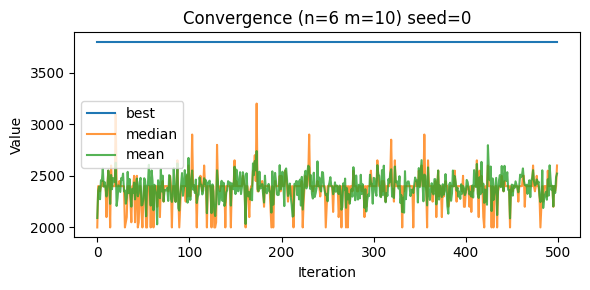


=== running seed 1
[iter 0/500] best=3800.0000 median=2100.0000 mean=2136.6667
[iter 50/500] best=3800.0000 median=2400.0000 mean=2405.0000
[iter 100/500] best=3800.0000 median=2400.0000 mean=2305.0000
[iter 150/500] best=3800.0000 median=2400.0000 mean=2233.3333
[iter 200/500] best=3800.0000 median=2400.0000 mean=2408.3333
[iter 250/500] best=3800.0000 median=2400.0000 mean=2383.3333
[iter 300/500] best=3800.0000 median=2150.0000 mean=2331.6667
[iter 350/500] best=3800.0000 median=2400.0000 mean=2445.0000
[iter 400/500] best=3800.0000 median=2400.0000 mean=2313.3333
[iter 450/500] best=3800.0000 median=2400.0000 mean=2410.0000
[iter 499/500] best=3800.0000 median=2400.0000 mean=2383.3333
Selected items: [1, 2, 5]
Value: 3800.0 Used per constraint: [66.0, 66.0, 14.0, 30.0, 41.0, 41.0, 0.0, 4.0, 10.0, 10.0]


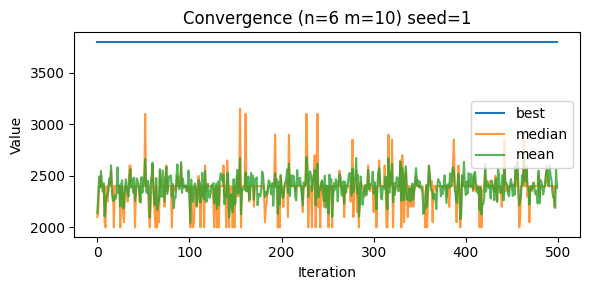


=== running seed 2
[iter 0/500] best=3800.0000 median=2400.0000 mean=2371.6667
[iter 50/500] best=3800.0000 median=2100.0000 mean=2213.3333
[iter 100/500] best=3800.0000 median=2150.0000 mean=2191.6667
[iter 150/500] best=3800.0000 median=2400.0000 mean=2413.3333
[iter 200/500] best=3800.0000 median=2400.0000 mean=2351.6667
[iter 250/500] best=3800.0000 median=2400.0000 mean=2458.3333
[iter 300/500] best=3800.0000 median=2450.0000 mean=2510.0000
[iter 350/500] best=3800.0000 median=2400.0000 mean=2236.6667
[iter 400/500] best=3800.0000 median=2000.0000 mean=2166.6667
[iter 450/500] best=3800.0000 median=2400.0000 mean=2418.3333
[iter 499/500] best=3800.0000 median=2300.0000 mean=2376.6667
Selected items: [1, 2, 5]
Value: 3800.0 Used per constraint: [66.0, 66.0, 14.0, 30.0, 41.0, 41.0, 0.0, 4.0, 10.0, 10.0]


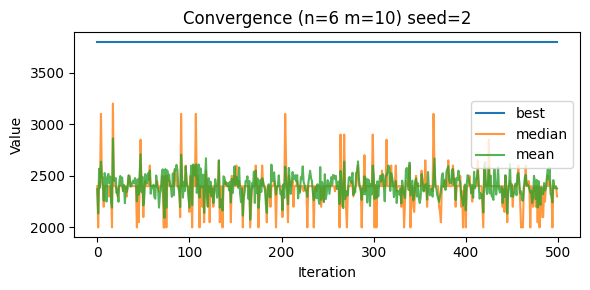


=== running seed 3
[iter 0/500] best=3800.0000 median=2000.0000 mean=2115.0000
[iter 50/500] best=3800.0000 median=2400.0000 mean=2536.6667
[iter 100/500] best=3800.0000 median=2400.0000 mean=2543.3333
[iter 150/500] best=3800.0000 median=2400.0000 mean=2396.6667
[iter 200/500] best=3800.0000 median=2400.0000 mean=2451.6667
[iter 250/500] best=3800.0000 median=2400.0000 mean=2480.0000
[iter 300/500] best=3800.0000 median=2400.0000 mean=2223.3333
[iter 350/500] best=3800.0000 median=2400.0000 mean=2446.6667
[iter 400/500] best=3800.0000 median=2400.0000 mean=2480.0000
[iter 450/500] best=3800.0000 median=2400.0000 mean=2370.0000
[iter 499/500] best=3800.0000 median=2100.0000 mean=2186.6667
Selected items: [1, 2, 5]
Value: 3800.0 Used per constraint: [66.0, 66.0, 14.0, 30.0, 41.0, 41.0, 0.0, 4.0, 10.0, 10.0]


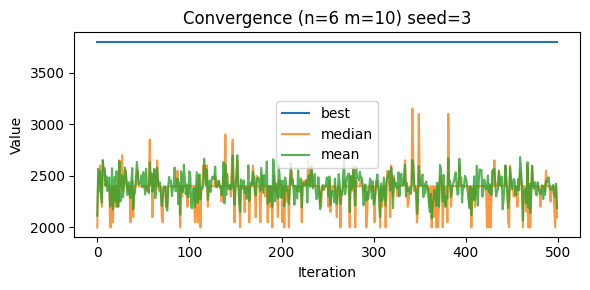


=== running seed 4
[iter 0/500] best=3800.0000 median=2400.0000 mean=2340.0000
[iter 50/500] best=3800.0000 median=2400.0000 mean=2300.0000
[iter 100/500] best=3800.0000 median=2200.0000 mean=2273.3333
[iter 150/500] best=3800.0000 median=2400.0000 mean=2510.0000
[iter 200/500] best=3800.0000 median=2400.0000 mean=2496.6667
[iter 250/500] best=3800.0000 median=2400.0000 mean=2468.3333
[iter 300/500] best=3800.0000 median=2000.0000 mean=2185.0000
[iter 350/500] best=3800.0000 median=2400.0000 mean=2466.6667
[iter 400/500] best=3800.0000 median=2600.0000 mean=2625.0000
[iter 450/500] best=3800.0000 median=2400.0000 mean=2391.6667
[iter 499/500] best=3800.0000 median=2350.0000 mean=2233.3333
Selected items: [1, 2, 5]
Value: 3800.0 Used per constraint: [66.0, 66.0, 14.0, 30.0, 41.0, 41.0, 0.0, 4.0, 10.0, 10.0]


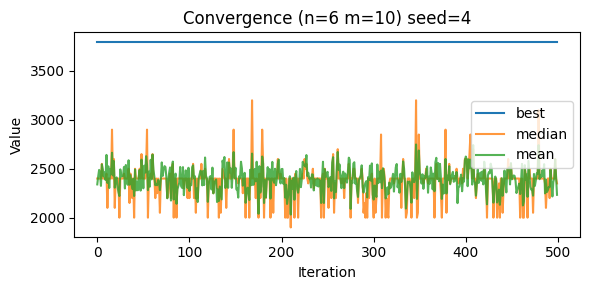


=== running seed 5
[iter 0/500] best=3800.0000 median=2600.0000 mean=2531.6667
[iter 50/500] best=3800.0000 median=2100.0000 mean=2171.6667
[iter 100/500] best=3800.0000 median=2400.0000 mean=2411.6667
[iter 150/500] best=3800.0000 median=2400.0000 mean=2371.6667
[iter 200/500] best=3800.0000 median=2400.0000 mean=2388.3333
[iter 250/500] best=3800.0000 median=2400.0000 mean=2291.6667
[iter 300/500] best=3800.0000 median=2350.0000 mean=2480.0000
[iter 350/500] best=3800.0000 median=2050.0000 mean=2233.3333
[iter 400/500] best=3800.0000 median=2400.0000 mean=2395.0000
[iter 450/500] best=3800.0000 median=2400.0000 mean=2390.0000
[iter 499/500] best=3800.0000 median=2050.0000 mean=2260.0000
Selected items: [1, 2, 5]
Value: 3800.0 Used per constraint: [66.0, 66.0, 14.0, 30.0, 41.0, 41.0, 0.0, 4.0, 10.0, 10.0]


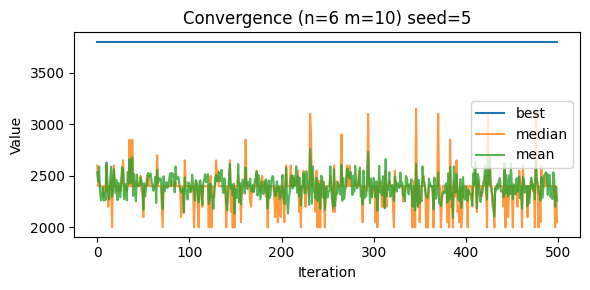


=== running seed 6
[iter 0/500] best=3800.0000 median=2400.0000 mean=2201.6667
[iter 50/500] best=3800.0000 median=2400.0000 mean=2410.0000
[iter 100/500] best=3800.0000 median=2400.0000 mean=2373.3333
[iter 150/500] best=3800.0000 median=2400.0000 mean=2438.3333
[iter 200/500] best=3800.0000 median=2900.0000 mean=2508.3333
[iter 250/500] best=3800.0000 median=2450.0000 mean=2508.3333
[iter 300/500] best=3800.0000 median=2000.0000 mean=2148.3333
[iter 350/500] best=3800.0000 median=2400.0000 mean=2328.3333
[iter 400/500] best=3800.0000 median=2400.0000 mean=2390.0000
[iter 450/500] best=3800.0000 median=2400.0000 mean=2320.0000
[iter 499/500] best=3800.0000 median=2400.0000 mean=2326.6667
Selected items: [1, 2, 5]
Value: 3800.0 Used per constraint: [66.0, 66.0, 14.0, 30.0, 41.0, 41.0, 0.0, 4.0, 10.0, 10.0]


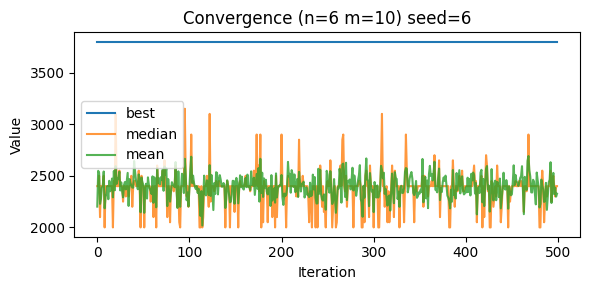


=== running seed 7
[iter 0/500] best=3800.0000 median=2100.0000 mean=2161.6667
[iter 50/500] best=3800.0000 median=2400.0000 mean=2326.6667
[iter 100/500] best=3800.0000 median=2350.0000 mean=2410.0000
[iter 150/500] best=3800.0000 median=2400.0000 mean=2486.6667
[iter 200/500] best=3800.0000 median=2400.0000 mean=2383.3333
[iter 250/500] best=3800.0000 median=3100.0000 mean=2638.3333
[iter 300/500] best=3800.0000 median=2000.0000 mean=2210.0000
[iter 350/500] best=3800.0000 median=2400.0000 mean=2360.0000
[iter 400/500] best=3800.0000 median=2500.0000 mean=2576.6667
[iter 450/500] best=3800.0000 median=2400.0000 mean=2400.0000
[iter 499/500] best=3800.0000 median=2750.0000 mean=2560.0000
Selected items: [1, 2, 5]
Value: 3800.0 Used per constraint: [66.0, 66.0, 14.0, 30.0, 41.0, 41.0, 0.0, 4.0, 10.0, 10.0]


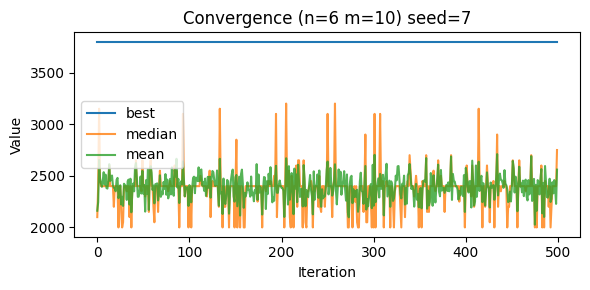


=== running seed 8
[iter 0/500] best=3800.0000 median=2000.0000 mean=2158.3333
[iter 50/500] best=3800.0000 median=2400.0000 mean=2415.0000
[iter 100/500] best=3800.0000 median=2400.0000 mean=2430.0000
[iter 150/500] best=3800.0000 median=2400.0000 mean=2428.3333
[iter 200/500] best=3800.0000 median=2400.0000 mean=2420.0000
[iter 250/500] best=3800.0000 median=2400.0000 mean=2290.0000
[iter 300/500] best=3800.0000 median=2400.0000 mean=2386.6667
[iter 350/500] best=3800.0000 median=2200.0000 mean=2271.6667
[iter 400/500] best=3800.0000 median=2400.0000 mean=2418.3333
[iter 450/500] best=3800.0000 median=2550.0000 mean=2480.0000
[iter 499/500] best=3800.0000 median=2350.0000 mean=2248.3333
Selected items: [1, 2, 5]
Value: 3800.0 Used per constraint: [66.0, 66.0, 14.0, 30.0, 41.0, 41.0, 0.0, 4.0, 10.0, 10.0]


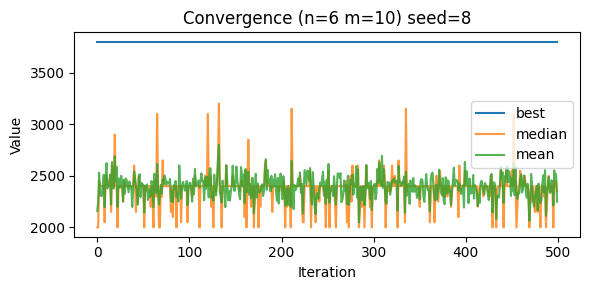


=== running seed 9
[iter 0/500] best=3800.0000 median=2150.0000 mean=2110.0000
[iter 50/500] best=3800.0000 median=2350.0000 mean=2265.0000
[iter 100/500] best=3800.0000 median=2400.0000 mean=2255.0000
[iter 150/500] best=3800.0000 median=2350.0000 mean=2210.0000
[iter 200/500] best=3800.0000 median=2450.0000 mean=2476.6667
[iter 250/500] best=3800.0000 median=2400.0000 mean=2493.3333
[iter 300/500] best=3800.0000 median=2300.0000 mean=2300.0000
[iter 350/500] best=3800.0000 median=2500.0000 mean=2450.0000
[iter 400/500] best=3800.0000 median=2400.0000 mean=2441.6667
[iter 450/500] best=3800.0000 median=2050.0000 mean=2223.3333
[iter 499/500] best=3800.0000 median=2000.0000 mean=2155.0000
Selected items: [1, 2, 5]
Value: 3800.0 Used per constraint: [66.0, 66.0, 14.0, 30.0, 41.0, 41.0, 0.0, 4.0, 10.0, 10.0]


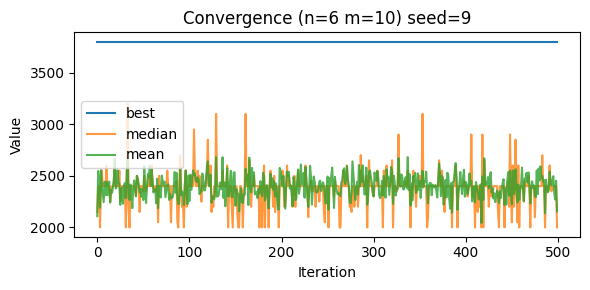



########## Instance 1  n= 10  m= 10  opt= 8706.1

=== running seed 0
[iter 0/500] best=8650.1000 median=5650.0000 mean=5478.5767
[iter 50/500] best=8706.1000 median=6518.4000 mean=6095.4050
[iter 100/500] best=8706.1000 median=6532.0000 mean=5755.0333
[iter 150/500] best=8706.1000 median=6534.4500 mean=6488.3150
[iter 200/500] best=8706.1000 median=6324.9000 mean=5973.6433
[iter 250/500] best=8706.1000 median=6862.2500 mean=6302.1900
[iter 300/500] best=8706.1000 median=6529.9000 mean=6058.3450
[iter 350/500] best=8706.1000 median=6058.1000 mean=5578.9883
[iter 400/500] best=8706.1000 median=7149.2500 mean=6337.7017
[iter 450/500] best=8706.1000 median=6532.0000 mean=5960.1000
[iter 499/500] best=8706.1000 median=6201.0500 mean=5985.5033
Selected items: [1, 3, 4, 7, 9]
Value: 8706.1 Used per constraint: [397.0, 539.0, 159.0, 302.0, 381.0, 430.0, 164.0, 300.0, 400.0, 470.0]


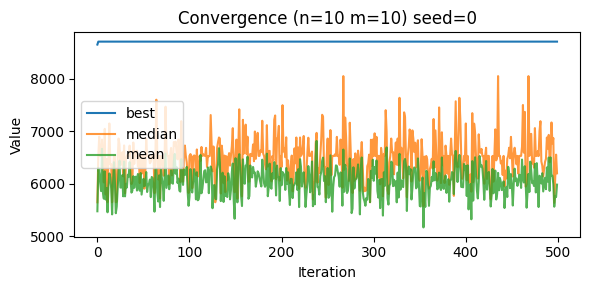


=== running seed 1
[iter 0/500] best=8650.1000 median=6481.1000 mean=5943.6550
[iter 50/500] best=8706.1000 median=6903.3500 mean=6207.0267
[iter 100/500] best=8706.1000 median=6687.2500 mean=5962.2783
[iter 150/500] best=8706.1000 median=6532.0000 mean=6207.8000
[iter 200/500] best=8706.1000 median=6532.0000 mean=6106.3417
[iter 250/500] best=8706.1000 median=7309.4000 mean=6769.5133
[iter 300/500] best=8706.1000 median=6534.4500 mean=6233.4867
[iter 350/500] best=8706.1000 median=5646.3000 mean=5553.4067
[iter 400/500] best=8706.1000 median=6252.4000 mean=5935.5167
[iter 450/500] best=8706.1000 median=6532.0000 mean=6128.2683
[iter 499/500] best=8706.1000 median=6325.2500 mean=5992.8417
Selected items: [1, 3, 4, 7, 9]
Value: 8706.1 Used per constraint: [397.0, 539.0, 159.0, 302.0, 381.0, 430.0, 164.0, 300.0, 400.0, 470.0]


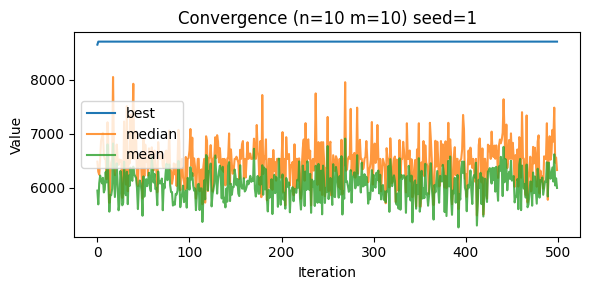


=== running seed 2
[iter 0/500] best=8360.5000 median=5970.6000 mean=5668.7600
[iter 50/500] best=8706.1000 median=6817.5000 mean=6315.8817
[iter 100/500] best=8706.1000 median=6520.6000 mean=6029.4800
[iter 150/500] best=8706.1000 median=7337.3000 mean=6154.1883
[iter 200/500] best=8706.1000 median=6341.8500 mean=5978.0233
[iter 250/500] best=8706.1000 median=6226.4000 mean=5910.5983
[iter 300/500] best=8706.1000 median=6721.3000 mean=6251.7217
[iter 350/500] best=8706.1000 median=6726.4000 mean=6337.7450
[iter 400/500] best=8706.1000 median=6221.8500 mean=6049.2033
[iter 450/500] best=8706.1000 median=6532.0000 mean=5919.5967
[iter 499/500] best=8706.1000 median=7354.8500 mean=6529.4000
Selected items: [1, 3, 4, 7, 9]
Value: 8706.1 Used per constraint: [397.0, 539.0, 159.0, 302.0, 381.0, 430.0, 164.0, 300.0, 400.0, 470.0]


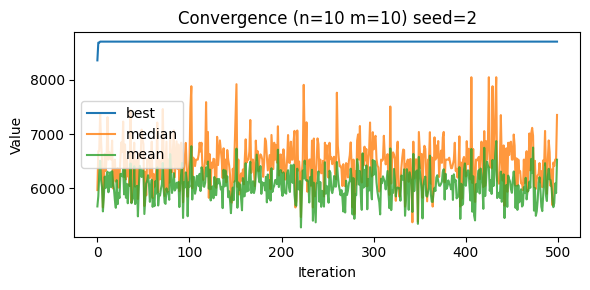


=== running seed 3
[iter 0/500] best=8650.1000 median=6016.6500 mean=5852.4867
[iter 50/500] best=8706.1000 median=6523.0500 mean=5837.8600
[iter 100/500] best=8706.1000 median=6755.4500 mean=6329.0400
[iter 150/500] best=8706.1000 median=5690.2000 mean=5275.1283
[iter 200/500] best=8706.1000 median=6471.8000 mean=5897.0233
[iter 250/500] best=8706.1000 median=8008.8500 mean=6363.9300
[iter 300/500] best=8706.1000 median=6842.5000 mean=6308.6500
[iter 350/500] best=8706.1000 median=5731.4500 mean=5985.2150
[iter 400/500] best=8706.1000 median=6206.0500 mean=6055.6617
[iter 450/500] best=8706.1000 median=6842.5000 mean=6304.7617
[iter 499/500] best=8706.1000 median=6862.2500 mean=6016.6217
Selected items: [1, 3, 4, 7, 9]
Value: 8706.1 Used per constraint: [397.0, 539.0, 159.0, 302.0, 381.0, 430.0, 164.0, 300.0, 400.0, 470.0]


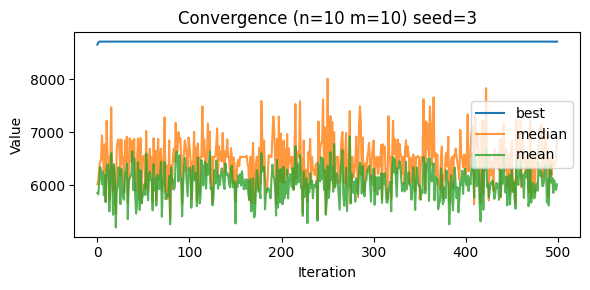


=== running seed 4
[iter 0/500] best=8650.1000 median=6363.0000 mean=5875.3850
[iter 50/500] best=8706.1000 median=5851.2500 mean=5579.2950
[iter 100/500] best=8706.1000 median=6532.0000 mean=6312.3433
[iter 150/500] best=8706.1000 median=6269.0000 mean=6086.9717
[iter 200/500] best=8706.1000 median=6815.6500 mean=6616.1083
[iter 250/500] best=8706.1000 median=7431.3000 mean=6558.3233
[iter 300/500] best=8706.1000 median=6766.6000 mean=6128.4517
[iter 350/500] best=8706.1000 median=6447.5000 mean=5769.3133
[iter 400/500] best=8706.1000 median=6842.5000 mean=6048.0933
[iter 450/500] best=8706.1000 median=6061.8000 mean=5603.5667
[iter 499/500] best=8706.1000 median=6401.3500 mean=6274.4517
Selected items: [1, 3, 4, 7, 9]
Value: 8706.1 Used per constraint: [397.0, 539.0, 159.0, 302.0, 381.0, 430.0, 164.0, 300.0, 400.0, 470.0]


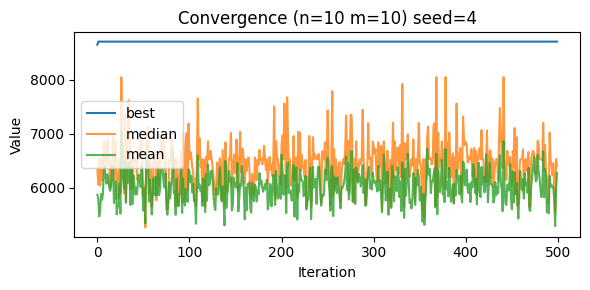


=== running seed 5
[iter 0/500] best=8650.1000 median=6048.8000 mean=5870.0650
[iter 50/500] best=8706.1000 median=6562.9000 mean=5986.7000
[iter 100/500] best=8706.1000 median=6532.0000 mean=6251.5583
[iter 150/500] best=8706.1000 median=6476.5500 mean=6065.0017
[iter 200/500] best=8706.1000 median=6707.0000 mean=6057.9567
[iter 250/500] best=8706.1000 median=6028.7000 mean=5649.6950
[iter 300/500] best=8706.1000 median=5997.8000 mean=6108.1983
[iter 350/500] best=8706.1000 median=6597.5000 mean=6209.4250
[iter 400/500] best=8706.1000 median=6532.0000 mean=6241.7950
[iter 450/500] best=8706.1000 median=6213.3500 mean=5744.0433
[iter 499/500] best=8706.1000 median=6212.5500 mean=5759.3850
Selected items: [1, 3, 4, 7, 9]
Value: 8706.1 Used per constraint: [397.0, 539.0, 159.0, 302.0, 381.0, 430.0, 164.0, 300.0, 400.0, 470.0]


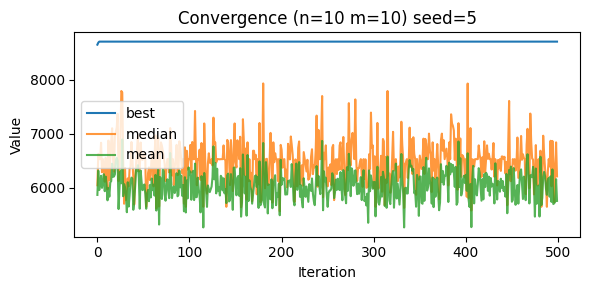


=== running seed 6
[iter 0/500] best=8650.1000 median=5903.5500 mean=5422.0117
[iter 50/500] best=8706.1000 median=6219.0500 mean=5972.8533
[iter 100/500] best=8706.1000 median=6904.5500 mean=6105.0400
[iter 150/500] best=8706.1000 median=5803.4000 mean=5693.0650
[iter 200/500] best=8706.1000 median=6532.0000 mean=5943.1733
[iter 250/500] best=8706.1000 median=6532.0000 mean=6232.9967
[iter 300/500] best=8706.1000 median=6532.0000 mean=6210.7400
[iter 350/500] best=8706.1000 median=5802.8000 mean=5665.7333
[iter 400/500] best=8706.1000 median=6849.7000 mean=6152.9117
[iter 450/500] best=8706.1000 median=6127.5000 mean=5872.4883
[iter 499/500] best=8706.1000 median=5815.3500 mean=5529.4933
Selected items: [1, 3, 4, 7, 9]
Value: 8706.1 Used per constraint: [397.0, 539.0, 159.0, 302.0, 381.0, 430.0, 164.0, 300.0, 400.0, 470.0]


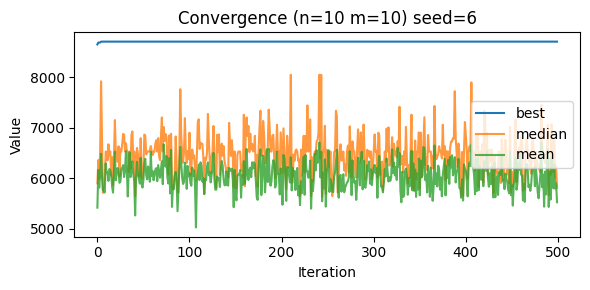


=== running seed 7
[iter 0/500] best=8650.1000 median=5815.4000 mean=5492.5250
[iter 50/500] best=8706.1000 median=6131.2000 mean=5855.9483
[iter 100/500] best=8706.1000 median=6054.9500 mean=6001.3483
[iter 150/500] best=8706.1000 median=6520.6000 mean=5727.6733
[iter 200/500] best=8706.1000 median=6532.0000 mean=6112.5183
[iter 250/500] best=8706.1000 median=6438.8000 mean=6293.8200
[iter 300/500] best=8706.1000 median=6705.6000 mean=6370.7683
[iter 350/500] best=8706.1000 median=6783.9000 mean=6463.2917
[iter 400/500] best=8706.1000 median=6882.7000 mean=6142.5150
[iter 450/500] best=8706.1000 median=6532.0000 mean=5931.0400
[iter 499/500] best=8706.1000 median=6440.6500 mean=5759.4250
Selected items: [1, 3, 4, 7, 9]
Value: 8706.1 Used per constraint: [397.0, 539.0, 159.0, 302.0, 381.0, 430.0, 164.0, 300.0, 400.0, 470.0]


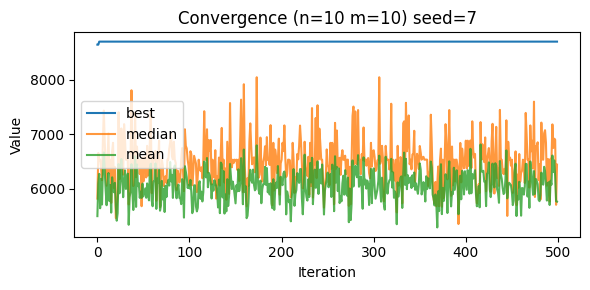


=== running seed 8
[iter 0/500] best=8706.1000 median=6045.6500 mean=5734.9450
[iter 50/500] best=8706.1000 median=7637.3500 mean=6204.2283
[iter 100/500] best=8706.1000 median=6363.0000 mean=6098.2117
[iter 150/500] best=8706.1000 median=6520.6000 mean=6057.1017
[iter 200/500] best=8706.1000 median=6447.5000 mean=5961.7700
[iter 250/500] best=8706.1000 median=6883.2500 mean=5817.3750
[iter 300/500] best=8706.1000 median=6045.1000 mean=5774.2617
[iter 350/500] best=8706.1000 median=6534.4500 mean=6214.0983
[iter 400/500] best=8706.1000 median=6262.8500 mean=5902.1067
[iter 450/500] best=8706.1000 median=6528.8500 mean=6240.8150
[iter 499/500] best=8706.1000 median=6346.0500 mean=5997.0183
Selected items: [1, 3, 4, 7, 9]
Value: 8706.1 Used per constraint: [397.0, 539.0, 159.0, 302.0, 381.0, 430.0, 164.0, 300.0, 400.0, 470.0]


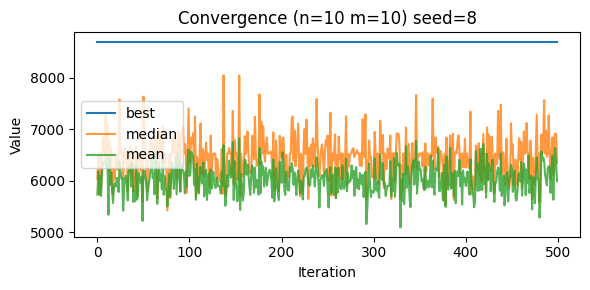


=== running seed 9
[iter 0/500] best=8650.1000 median=6307.7000 mean=5815.8117
[iter 50/500] best=8706.1000 median=6779.0500 mean=6037.4150
[iter 100/500] best=8706.1000 median=6640.6500 mean=6307.3850
[iter 150/500] best=8706.1000 median=6532.0000 mean=6036.6767
[iter 200/500] best=8706.1000 median=5960.7500 mean=5618.3567
[iter 250/500] best=8706.1000 median=6901.4000 mean=6238.8217
[iter 300/500] best=8706.1000 median=6350.6000 mean=6083.1867
[iter 350/500] best=8706.1000 median=6532.0000 mean=5743.9067
[iter 400/500] best=8706.1000 median=7538.6500 mean=6647.9167
[iter 450/500] best=8706.1000 median=6292.2500 mean=6152.0950
[iter 499/500] best=8706.1000 median=6350.6000 mean=6117.5500
Selected items: [1, 3, 4, 7, 9]
Value: 8706.1 Used per constraint: [397.0, 539.0, 159.0, 302.0, 381.0, 430.0, 164.0, 300.0, 400.0, 470.0]


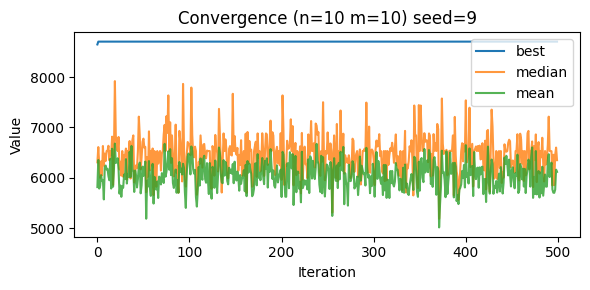



########## Instance 2  n= 15  m= 10  opt= 4015

=== running seed 0
[iter 0/500] best=3890.0000 median=2375.0000 mean=2319.5833
[iter 50/500] best=4015.0000 median=2380.0000 mean=2477.4167
[iter 100/500] best=4015.0000 median=2752.5000 mean=2706.5833
[iter 150/500] best=4015.0000 median=2545.0000 mean=2612.5000
[iter 200/500] best=4015.0000 median=2545.0000 mean=2597.9167
[iter 250/500] best=4015.0000 median=2480.0000 mean=2490.4167
[iter 300/500] best=4015.0000 median=2292.5000 mean=2358.7500
[iter 350/500] best=4015.0000 median=2617.5000 mean=2581.0000
[iter 400/500] best=4015.0000 median=2577.5000 mean=2629.5000
[iter 450/500] best=4015.0000 median=2700.0000 mean=2733.6667
[iter 499/500] best=4015.0000 median=2562.5000 mean=2592.5000
Selected items: [0, 1, 3, 5, 6, 8, 9, 13, 14]
Value: 4015.0 Used per constraint: [515.0, 665.0, 118.0, 207.0, 227.0, 239.0, 106.0, 201.0, 241.0, 262.0]


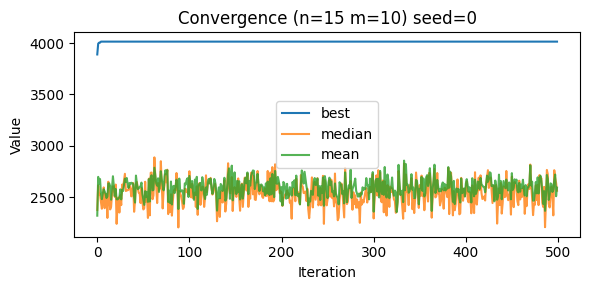


=== running seed 1
[iter 0/500] best=3950.0000 median=2547.5000 mean=2505.2500
[iter 50/500] best=4015.0000 median=2457.5000 mean=2556.3333
[iter 100/500] best=4015.0000 median=2492.5000 mean=2562.8333
[iter 150/500] best=4015.0000 median=2547.5000 mean=2695.0833
[iter 200/500] best=4015.0000 median=2550.0000 mean=2683.0833
[iter 250/500] best=4015.0000 median=2575.0000 mean=2644.3333
[iter 300/500] best=4015.0000 median=2520.0000 mean=2613.4167
[iter 350/500] best=4015.0000 median=2570.0000 mean=2602.8333
[iter 400/500] best=4015.0000 median=2572.5000 mean=2619.5833
[iter 450/500] best=4015.0000 median=2675.0000 mean=2704.8333
[iter 499/500] best=4015.0000 median=2485.0000 mean=2503.5833
Selected items: [0, 1, 3, 5, 6, 8, 9, 13, 14]
Value: 4015.0 Used per constraint: [515.0, 665.0, 118.0, 207.0, 227.0, 239.0, 106.0, 201.0, 241.0, 262.0]


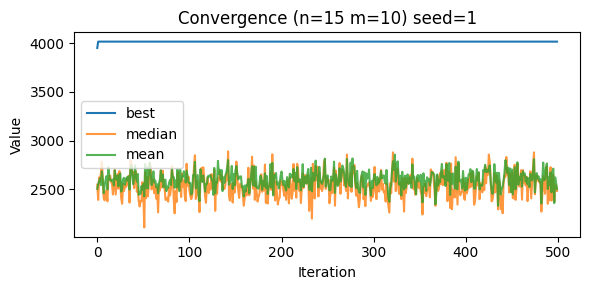


=== running seed 2
[iter 0/500] best=3695.0000 median=2382.5000 mean=2360.6667
[iter 50/500] best=4015.0000 median=2312.5000 mean=2524.7500
[iter 100/500] best=4015.0000 median=2485.0000 mean=2600.9167
[iter 150/500] best=4015.0000 median=2725.0000 mean=2673.5833
[iter 200/500] best=4015.0000 median=2490.0000 mean=2658.6667
[iter 250/500] best=4015.0000 median=2455.0000 mean=2562.5000
[iter 300/500] best=4015.0000 median=2585.0000 mean=2599.5833
[iter 350/500] best=4015.0000 median=2610.0000 mean=2597.0833
[iter 400/500] best=4015.0000 median=2425.0000 mean=2485.2500
[iter 450/500] best=4015.0000 median=2665.0000 mean=2595.9167
[iter 499/500] best=4015.0000 median=2480.0000 mean=2551.1667
Selected items: [0, 1, 3, 5, 6, 8, 9, 13, 14]
Value: 4015.0 Used per constraint: [515.0, 665.0, 118.0, 207.0, 227.0, 239.0, 106.0, 201.0, 241.0, 262.0]


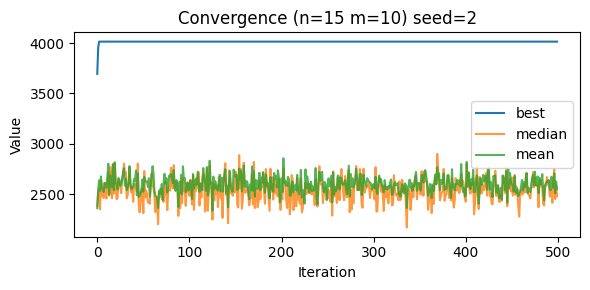


=== running seed 3
[iter 0/500] best=3935.0000 median=2372.5000 mean=2436.9167
[iter 50/500] best=4015.0000 median=2542.5000 mean=2628.6667
[iter 100/500] best=4015.0000 median=2170.0000 mean=2445.5833
[iter 150/500] best=4015.0000 median=2287.5000 mean=2410.5833
[iter 200/500] best=4015.0000 median=2682.5000 mean=2673.3333
[iter 250/500] best=4015.0000 median=2545.0000 mean=2571.0000
[iter 300/500] best=4015.0000 median=2780.0000 mean=2770.1667
[iter 350/500] best=4015.0000 median=2675.0000 mean=2754.5833
[iter 400/500] best=4015.0000 median=2595.0000 mean=2683.4167
[iter 450/500] best=4015.0000 median=2515.0000 mean=2475.0833
[iter 499/500] best=4015.0000 median=2470.0000 mean=2491.2500
Selected items: [0, 1, 3, 5, 6, 8, 9, 13, 14]
Value: 4015.0 Used per constraint: [515.0, 665.0, 118.0, 207.0, 227.0, 239.0, 106.0, 201.0, 241.0, 262.0]


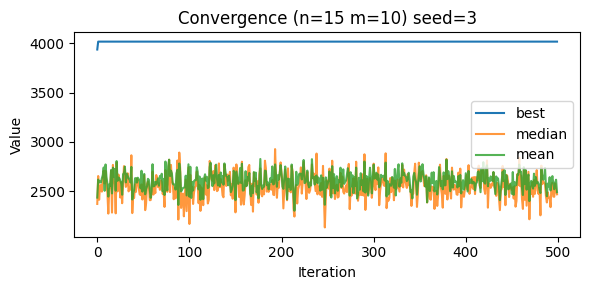


=== running seed 4
[iter 0/500] best=3855.0000 median=2267.5000 mean=2397.8333
[iter 50/500] best=4015.0000 median=2507.5000 mean=2641.3333
[iter 100/500] best=4015.0000 median=2747.5000 mean=2699.9167
[iter 150/500] best=4015.0000 median=2662.5000 mean=2715.5000
[iter 200/500] best=4015.0000 median=2517.5000 mean=2586.6667
[iter 250/500] best=4015.0000 median=2582.5000 mean=2618.3333
[iter 300/500] best=4015.0000 median=2735.0000 mean=2671.6667
[iter 350/500] best=4015.0000 median=2490.0000 mean=2613.7500
[iter 400/500] best=4015.0000 median=2440.0000 mean=2450.3333
[iter 450/500] best=4015.0000 median=2480.0000 mean=2531.0000
[iter 499/500] best=4015.0000 median=2787.5000 mean=2757.0833
Selected items: [0, 1, 3, 5, 6, 8, 9, 13, 14]
Value: 4015.0 Used per constraint: [515.0, 665.0, 118.0, 207.0, 227.0, 239.0, 106.0, 201.0, 241.0, 262.0]


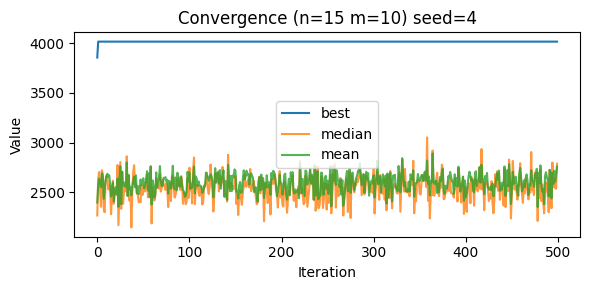


=== running seed 5
[iter 0/500] best=3850.0000 median=2122.5000 mean=2213.1667
[iter 50/500] best=4015.0000 median=2565.0000 mean=2598.7500
[iter 100/500] best=4015.0000 median=2227.5000 mean=2488.0833
[iter 150/500] best=4015.0000 median=2652.5000 mean=2696.1667
[iter 200/500] best=4015.0000 median=2560.0000 mean=2640.4167
[iter 250/500] best=4015.0000 median=2795.0000 mean=2795.6667
[iter 300/500] best=4015.0000 median=2615.0000 mean=2596.0000
[iter 350/500] best=4015.0000 median=2702.5000 mean=2678.5000
[iter 400/500] best=4015.0000 median=2412.5000 mean=2475.8333
[iter 450/500] best=4015.0000 median=2480.0000 mean=2543.7500
[iter 499/500] best=4015.0000 median=2517.5000 mean=2561.5000
Selected items: [0, 1, 3, 5, 6, 8, 9, 13, 14]
Value: 4015.0 Used per constraint: [515.0, 665.0, 118.0, 207.0, 227.0, 239.0, 106.0, 201.0, 241.0, 262.0]


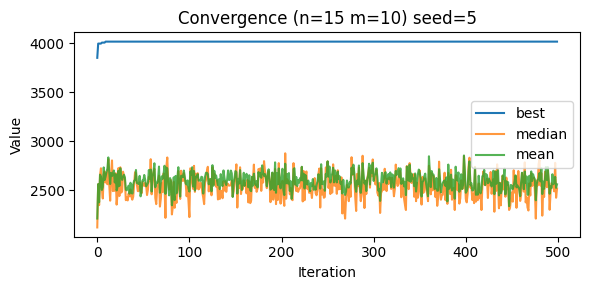


=== running seed 6
[iter 0/500] best=3850.0000 median=2212.5000 mean=2266.5833
[iter 50/500] best=4015.0000 median=2555.0000 mean=2614.5000
[iter 100/500] best=4015.0000 median=2477.5000 mean=2587.4167
[iter 150/500] best=4015.0000 median=2557.5000 mean=2632.5000
[iter 200/500] best=4015.0000 median=2492.5000 mean=2555.5000
[iter 250/500] best=4015.0000 median=2290.0000 mean=2502.6667
[iter 300/500] best=4015.0000 median=2565.0000 mean=2549.3333
[iter 350/500] best=4015.0000 median=2485.0000 mean=2510.1667
[iter 400/500] best=4015.0000 median=2450.0000 mean=2500.7500
[iter 450/500] best=4015.0000 median=2482.5000 mean=2628.5833
[iter 499/500] best=4015.0000 median=2702.5000 mean=2677.9167
Selected items: [0, 1, 3, 5, 6, 8, 9, 13, 14]
Value: 4015.0 Used per constraint: [515.0, 665.0, 118.0, 207.0, 227.0, 239.0, 106.0, 201.0, 241.0, 262.0]


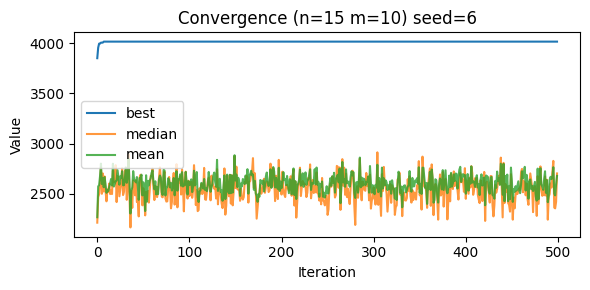


=== running seed 7
[iter 0/500] best=3580.0000 median=2437.5000 mean=2318.1667
[iter 50/500] best=4015.0000 median=2537.5000 mean=2595.3333
[iter 100/500] best=4015.0000 median=2520.0000 mean=2574.2500
[iter 150/500] best=4015.0000 median=2610.0000 mean=2568.8333
[iter 200/500] best=4015.0000 median=2407.5000 mean=2541.0833
[iter 250/500] best=4015.0000 median=2490.0000 mean=2530.3333
[iter 300/500] best=4015.0000 median=2555.0000 mean=2518.0000
[iter 350/500] best=4015.0000 median=2385.0000 mean=2544.3333
[iter 400/500] best=4015.0000 median=2807.5000 mean=2680.0000
[iter 450/500] best=4015.0000 median=2742.5000 mean=2637.9167
[iter 499/500] best=4015.0000 median=2492.5000 mean=2553.6667
Selected items: [0, 1, 3, 5, 6, 8, 9, 13, 14]
Value: 4015.0 Used per constraint: [515.0, 665.0, 118.0, 207.0, 227.0, 239.0, 106.0, 201.0, 241.0, 262.0]


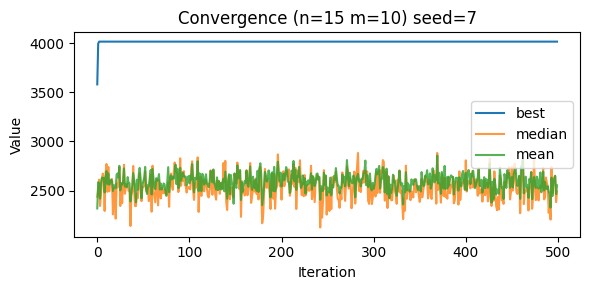


=== running seed 8
[iter 0/500] best=4015.0000 median=2485.0000 mean=2437.4167
[iter 50/500] best=4015.0000 median=2587.5000 mean=2561.1667
[iter 100/500] best=4015.0000 median=2662.5000 mean=2687.1667
[iter 150/500] best=4015.0000 median=2662.5000 mean=2572.5833
[iter 200/500] best=4015.0000 median=2580.0000 mean=2669.0000
[iter 250/500] best=4015.0000 median=2422.5000 mean=2522.7500
[iter 300/500] best=4015.0000 median=2560.0000 mean=2670.8333
[iter 350/500] best=4015.0000 median=2657.5000 mean=2663.2500
[iter 400/500] best=4015.0000 median=2542.5000 mean=2623.6667
[iter 450/500] best=4015.0000 median=2542.5000 mean=2654.9167
[iter 499/500] best=4015.0000 median=2650.0000 mean=2615.3333
Selected items: [0, 1, 3, 5, 6, 8, 9, 13, 14]
Value: 4015.0 Used per constraint: [515.0, 665.0, 118.0, 207.0, 227.0, 239.0, 106.0, 201.0, 241.0, 262.0]


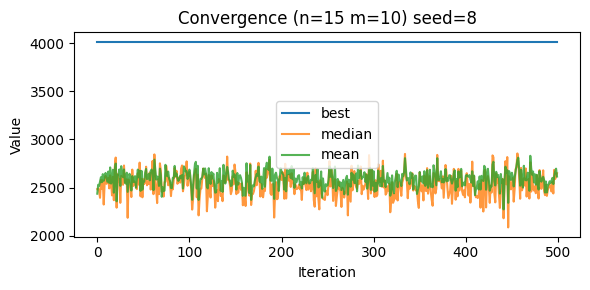


=== running seed 9
[iter 0/500] best=3850.0000 median=2235.0000 mean=2318.3333
[iter 50/500] best=4015.0000 median=2527.5000 mean=2542.0833
[iter 100/500] best=4015.0000 median=2610.0000 mean=2610.0000
[iter 150/500] best=4015.0000 median=2557.5000 mean=2696.5833
[iter 200/500] best=4015.0000 median=2392.5000 mean=2413.4167
[iter 250/500] best=4015.0000 median=2447.5000 mean=2599.1667
[iter 300/500] best=4015.0000 median=2672.5000 mean=2685.5000
[iter 350/500] best=4015.0000 median=2510.0000 mean=2529.6667
[iter 400/500] best=4015.0000 median=2735.0000 mean=2638.8333
[iter 450/500] best=4015.0000 median=2365.0000 mean=2556.3333
[iter 499/500] best=4015.0000 median=2565.0000 mean=2612.4167
Selected items: [0, 1, 3, 5, 6, 8, 9, 13, 14]
Value: 4015.0 Used per constraint: [515.0, 665.0, 118.0, 207.0, 227.0, 239.0, 106.0, 201.0, 241.0, 262.0]


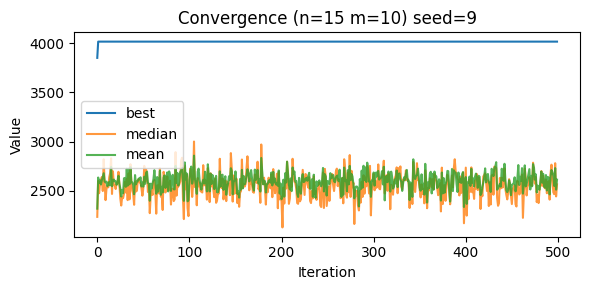



########## Instance 3  n= 20  m= 10  opt= 6120

=== running seed 0
[iter 0/500] best=5880.0000 median=3465.0000 mean=3746.1667
[iter 50/500] best=6110.0000 median=4560.0000 mean=4250.9167
[iter 100/500] best=6110.0000 median=3690.0000 mean=3886.2500
[iter 150/500] best=6120.0000 median=4695.0000 mean=4301.0833
[iter 200/500] best=6120.0000 median=4077.5000 mean=4067.1667
[iter 250/500] best=6120.0000 median=3952.5000 mean=4011.0000
[iter 300/500] best=6120.0000 median=4087.5000 mean=3954.9167
[iter 350/500] best=6120.0000 median=4132.5000 mean=4093.0000
[iter 400/500] best=6120.0000 median=4145.0000 mean=4008.1667
[iter 450/500] best=6120.0000 median=3865.0000 mean=3837.0000
[iter 499/500] best=6120.0000 median=4490.0000 mean=4291.6667
Selected items: [0, 9, 13, 14, 15, 16, 17, 18, 19]
Value: 6120.0 Used per constraint: [497.0, 699.0, 70.0, 193.0, 235.0, 256.0, 86.0, 177.0, 245.0, 275.0]


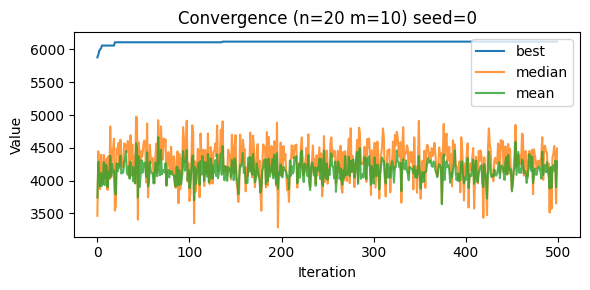


=== running seed 1
[iter 0/500] best=5880.0000 median=4180.0000 mean=4000.3333
[iter 50/500] best=6120.0000 median=3815.0000 mean=3802.6667
[iter 100/500] best=6120.0000 median=4530.0000 mean=4398.5833
[iter 150/500] best=6120.0000 median=4522.5000 mean=4314.3333
[iter 200/500] best=6120.0000 median=4135.0000 mean=4194.4167
[iter 250/500] best=6120.0000 median=4627.5000 mean=4297.5000
[iter 300/500] best=6120.0000 median=4552.5000 mean=4248.0000
[iter 350/500] best=6120.0000 median=4432.5000 mean=4300.8333
[iter 400/500] best=6120.0000 median=4495.0000 mean=4223.5000
[iter 450/500] best=6120.0000 median=4457.5000 mean=4270.5000
[iter 499/500] best=6120.0000 median=4055.0000 mean=4098.6667
Selected items: [0, 9, 13, 14, 15, 16, 17, 18, 19]
Value: 6120.0 Used per constraint: [497.0, 699.0, 70.0, 193.0, 235.0, 256.0, 86.0, 177.0, 245.0, 275.0]


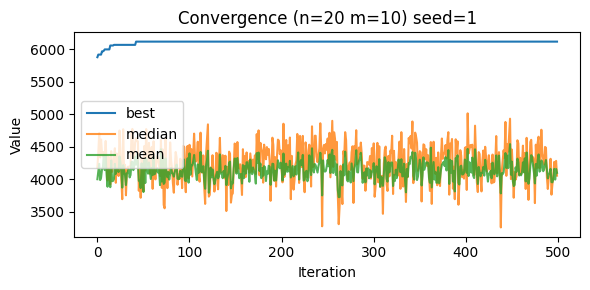


=== running seed 2
[iter 0/500] best=5880.0000 median=3980.0000 mean=3873.8333
[iter 50/500] best=6090.0000 median=4212.5000 mean=4120.2500
[iter 100/500] best=6120.0000 median=4222.5000 mean=3985.5833
[iter 150/500] best=6120.0000 median=4260.0000 mean=4109.7500
[iter 200/500] best=6120.0000 median=4060.0000 mean=4000.5000
[iter 250/500] best=6120.0000 median=4060.0000 mean=3936.9167
[iter 300/500] best=6120.0000 median=4152.5000 mean=4110.8333
[iter 350/500] best=6120.0000 median=4530.0000 mean=4393.7500
[iter 400/500] best=6120.0000 median=4442.5000 mean=4196.0833
[iter 450/500] best=6120.0000 median=4782.5000 mean=4187.0833
[iter 499/500] best=6120.0000 median=4205.0000 mean=4037.2500
Selected items: [0, 9, 13, 14, 15, 16, 17, 18, 19]
Value: 6120.0 Used per constraint: [497.0, 699.0, 70.0, 193.0, 235.0, 256.0, 86.0, 177.0, 245.0, 275.0]


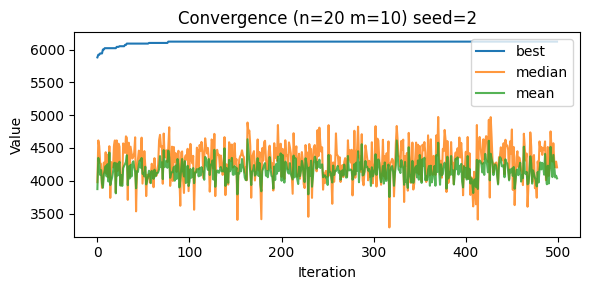


=== running seed 3
[iter 0/500] best=5880.0000 median=3710.0000 mean=3822.5000
[iter 50/500] best=6120.0000 median=3917.5000 mean=3885.5000
[iter 100/500] best=6120.0000 median=4347.5000 mean=4107.0833
[iter 150/500] best=6120.0000 median=4605.0000 mean=4284.2500
[iter 200/500] best=6120.0000 median=3927.5000 mean=3946.9167
[iter 250/500] best=6120.0000 median=4415.0000 mean=4120.7500
[iter 300/500] best=6120.0000 median=3895.0000 mean=3978.9167
[iter 350/500] best=6120.0000 median=4340.0000 mean=4263.2500
[iter 400/500] best=6120.0000 median=3982.5000 mean=4013.4167
[iter 450/500] best=6120.0000 median=4120.0000 mean=3964.4167
[iter 499/500] best=6120.0000 median=4735.0000 mean=4504.6667
Selected items: [0, 9, 13, 14, 15, 16, 17, 18, 19]
Value: 6120.0 Used per constraint: [497.0, 699.0, 70.0, 193.0, 235.0, 256.0, 86.0, 177.0, 245.0, 275.0]


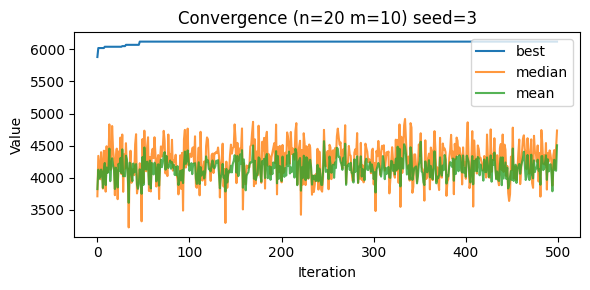


=== running seed 4
[iter 0/500] best=5920.0000 median=3942.5000 mean=3928.0000
[iter 50/500] best=6070.0000 median=4195.0000 mean=4003.1667
[iter 100/500] best=6090.0000 median=4127.5000 mean=4165.5833
[iter 150/500] best=6100.0000 median=4540.0000 mean=4292.0000
[iter 200/500] best=6100.0000 median=3837.5000 mean=3940.3333
[iter 250/500] best=6120.0000 median=4370.0000 mean=4185.9167
[iter 300/500] best=6120.0000 median=4715.0000 mean=4528.2500
[iter 350/500] best=6120.0000 median=4310.0000 mean=4173.8333
[iter 400/500] best=6120.0000 median=4235.0000 mean=4113.5000
[iter 450/500] best=6120.0000 median=4390.0000 mean=4313.1667
[iter 499/500] best=6120.0000 median=4282.5000 mean=4396.0000
Selected items: [0, 9, 13, 14, 15, 16, 17, 18, 19]
Value: 6120.0 Used per constraint: [497.0, 699.0, 70.0, 193.0, 235.0, 256.0, 86.0, 177.0, 245.0, 275.0]


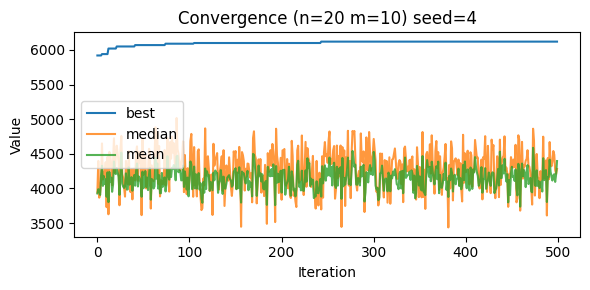


=== running seed 5
[iter 0/500] best=5920.0000 median=3600.0000 mean=3638.0000
[iter 50/500] best=6100.0000 median=4227.5000 mean=4119.0000
[iter 100/500] best=6120.0000 median=4545.0000 mean=4448.6667
[iter 150/500] best=6120.0000 median=3897.5000 mean=3993.5833
[iter 200/500] best=6120.0000 median=4417.5000 mean=4128.4167
[iter 250/500] best=6120.0000 median=4322.5000 mean=4029.8333
[iter 300/500] best=6120.0000 median=4552.5000 mean=4212.9167
[iter 350/500] best=6120.0000 median=3952.5000 mean=3930.4167
[iter 400/500] best=6120.0000 median=4390.0000 mean=4301.7500
[iter 450/500] best=6120.0000 median=4652.5000 mean=4367.9167
[iter 499/500] best=6120.0000 median=4360.0000 mean=4138.7500
Selected items: [0, 9, 13, 14, 15, 16, 17, 18, 19]
Value: 6120.0 Used per constraint: [497.0, 699.0, 70.0, 193.0, 235.0, 256.0, 86.0, 177.0, 245.0, 275.0]


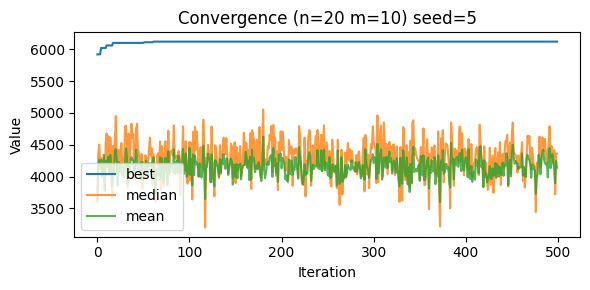


=== running seed 6
[iter 0/500] best=5880.0000 median=3745.0000 mean=3650.2500
[iter 50/500] best=6120.0000 median=4135.0000 mean=4109.0833
[iter 100/500] best=6120.0000 median=4410.0000 mean=4338.7500
[iter 150/500] best=6120.0000 median=4092.5000 mean=4182.5833
[iter 200/500] best=6120.0000 median=4475.0000 mean=4229.2500
[iter 250/500] best=6120.0000 median=4730.0000 mean=4350.6667
[iter 300/500] best=6120.0000 median=4552.5000 mean=4309.6667
[iter 350/500] best=6120.0000 median=4350.0000 mean=4090.6667
[iter 400/500] best=6120.0000 median=4487.5000 mean=4299.8333
[iter 450/500] best=6120.0000 median=4487.5000 mean=4297.1667
[iter 499/500] best=6120.0000 median=3897.5000 mean=4082.7500
Selected items: [0, 9, 13, 14, 15, 16, 17, 18, 19]
Value: 6120.0 Used per constraint: [497.0, 699.0, 70.0, 193.0, 235.0, 256.0, 86.0, 177.0, 245.0, 275.0]


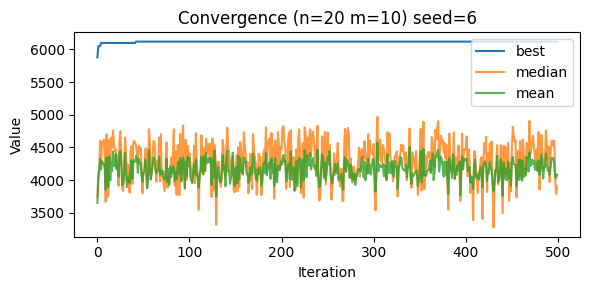


=== running seed 7
[iter 0/500] best=5605.0000 median=4157.5000 mean=3921.4167
[iter 50/500] best=6110.0000 median=4512.5000 mean=4357.0833
[iter 100/500] best=6120.0000 median=4607.5000 mean=4294.3333
[iter 150/500] best=6120.0000 median=4525.0000 mean=4244.5833
[iter 200/500] best=6120.0000 median=4385.0000 mean=4180.9167
[iter 250/500] best=6120.0000 median=4492.5000 mean=4269.3333
[iter 300/500] best=6120.0000 median=4372.5000 mean=4292.0833
[iter 350/500] best=6120.0000 median=4350.0000 mean=4284.1667
[iter 400/500] best=6120.0000 median=4522.5000 mean=4294.4167
[iter 450/500] best=6120.0000 median=4127.5000 mean=3939.5000
[iter 499/500] best=6120.0000 median=4337.5000 mean=4168.4167
Selected items: [0, 9, 13, 14, 15, 16, 17, 18, 19]
Value: 6120.0 Used per constraint: [497.0, 699.0, 70.0, 193.0, 235.0, 256.0, 86.0, 177.0, 245.0, 275.0]


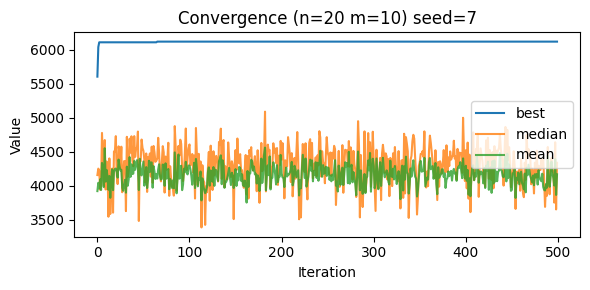


=== running seed 8
[iter 0/500] best=5880.0000 median=3882.5000 mean=3892.2500
[iter 50/500] best=6120.0000 median=4197.5000 mean=4167.8333
[iter 100/500] best=6120.0000 median=3952.5000 mean=3933.4167
[iter 150/500] best=6120.0000 median=4522.5000 mean=4143.0833
[iter 200/500] best=6120.0000 median=4295.0000 mean=4243.9167
[iter 250/500] best=6120.0000 median=4985.0000 mean=4394.8333
[iter 300/500] best=6120.0000 median=4297.5000 mean=4078.4167
[iter 350/500] best=6120.0000 median=4130.0000 mean=4169.3333
[iter 400/500] best=6120.0000 median=4587.5000 mean=4300.0000
[iter 450/500] best=6120.0000 median=4130.0000 mean=4072.0833
[iter 499/500] best=6120.0000 median=4505.0000 mean=4219.3333
Selected items: [0, 9, 13, 14, 15, 16, 17, 18, 19]
Value: 6120.0 Used per constraint: [497.0, 699.0, 70.0, 193.0, 235.0, 256.0, 86.0, 177.0, 245.0, 275.0]


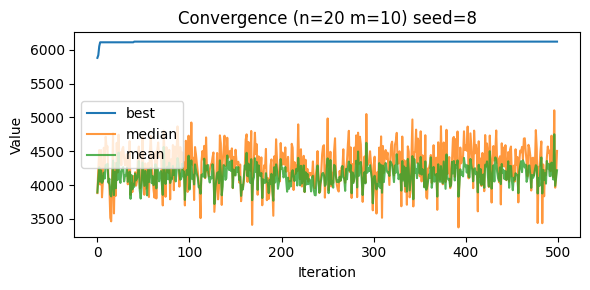


=== running seed 9
[iter 0/500] best=5920.0000 median=3847.5000 mean=3766.0833
[iter 50/500] best=6070.0000 median=4175.0000 mean=4062.2500
[iter 100/500] best=6120.0000 median=4337.5000 mean=4183.1667
[iter 150/500] best=6120.0000 median=4152.5000 mean=3964.9167
[iter 200/500] best=6120.0000 median=4042.5000 mean=4150.2500
[iter 250/500] best=6120.0000 median=3647.5000 mean=3777.3333
[iter 300/500] best=6120.0000 median=4565.0000 mean=4256.3333
[iter 350/500] best=6120.0000 median=3722.5000 mean=3915.2500
[iter 400/500] best=6120.0000 median=3717.5000 mean=3993.6667
[iter 450/500] best=6120.0000 median=4750.0000 mean=4381.9167
[iter 499/500] best=6120.0000 median=4410.0000 mean=4199.7500
Selected items: [0, 9, 13, 14, 15, 16, 17, 18, 19]
Value: 6120.0 Used per constraint: [497.0, 699.0, 70.0, 193.0, 235.0, 256.0, 86.0, 177.0, 245.0, 275.0]


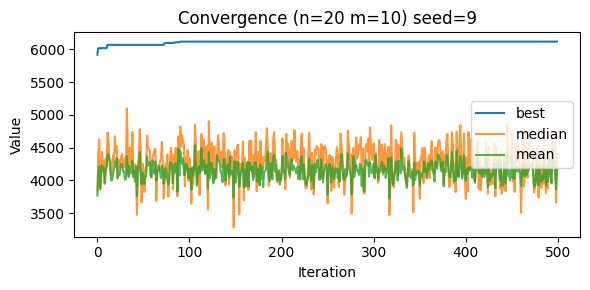



########## Instance 4  n= 28  m= 10  opt= 12400

=== running seed 0
[iter 0/500] best=11260.0000 median=8130.0000 mean=7566.1667
[iter 50/500] best=12390.0000 median=8510.0000 mean=8326.5833
[iter 100/500] best=12400.0000 median=8160.0000 mean=7952.3333
[iter 150/500] best=12400.0000 median=8185.0000 mean=8325.0000
[iter 200/500] best=12400.0000 median=8255.0000 mean=8473.5833
[iter 250/500] best=12400.0000 median=8345.0000 mean=8401.2500
[iter 300/500] best=12400.0000 median=8040.0000 mean=8110.0000
[iter 350/500] best=12400.0000 median=8417.5000 mean=8456.1667
[iter 400/500] best=12400.0000 median=8590.0000 mean=8378.0833
[iter 450/500] best=12400.0000 median=8327.5000 mean=8373.4167
[iter 499/500] best=12400.0000 median=8080.0000 mean=7914.3333
Selected items: [0, 1, 2, 8, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27]
Value: 12400.0 Used per constraint: [815.0, 1204.0, 173.0, 370.0, 443.0, 469.0, 146.0, 323.0, 453.0, 490.0]


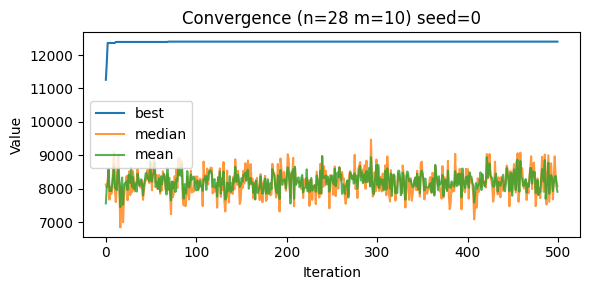


=== running seed 1
[iter 0/500] best=10910.0000 median=7660.0000 mean=7547.7500
[iter 50/500] best=12390.0000 median=7730.0000 mean=8029.7500
[iter 100/500] best=12390.0000 median=8572.5000 mean=8521.0000
[iter 150/500] best=12400.0000 median=8057.5000 mean=8209.5833
[iter 200/500] best=12400.0000 median=8125.0000 mean=8136.4167
[iter 250/500] best=12400.0000 median=7540.0000 mean=7986.5833
[iter 300/500] best=12400.0000 median=8020.0000 mean=8367.7500
[iter 350/500] best=12400.0000 median=8377.5000 mean=8400.6667
[iter 400/500] best=12400.0000 median=7945.0000 mean=8106.1667
[iter 450/500] best=12400.0000 median=7090.0000 mean=7524.8333
[iter 499/500] best=12400.0000 median=8427.5000 mean=8400.0833
Selected items: [0, 1, 2, 8, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27]
Value: 12400.0 Used per constraint: [815.0, 1204.0, 173.0, 370.0, 443.0, 469.0, 146.0, 323.0, 453.0, 490.0]


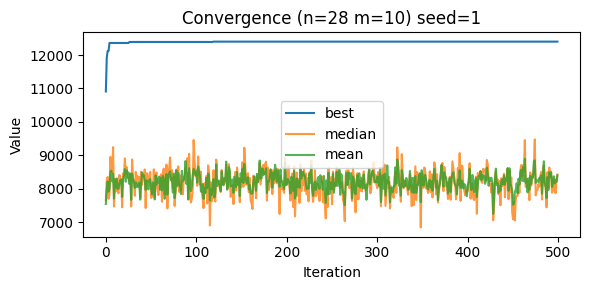


=== running seed 2
[iter 0/500] best=11640.0000 median=7680.0000 mean=7635.0000
[iter 50/500] best=12390.0000 median=8200.0000 mean=8328.7500
[iter 100/500] best=12390.0000 median=8707.5000 mean=8556.0000
[iter 150/500] best=12390.0000 median=8120.0000 mean=7983.7500
[iter 200/500] best=12400.0000 median=8325.0000 mean=8140.4167
[iter 250/500] best=12400.0000 median=8080.0000 mean=8104.5000
[iter 300/500] best=12400.0000 median=8082.5000 mean=8026.4167
[iter 350/500] best=12400.0000 median=8545.0000 mean=8487.8333
[iter 400/500] best=12400.0000 median=8425.0000 mean=8341.3333
[iter 450/500] best=12400.0000 median=8125.0000 mean=8139.4167
[iter 499/500] best=12400.0000 median=7702.5000 mean=7887.8333
Selected items: [0, 1, 2, 8, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27]
Value: 12400.0 Used per constraint: [815.0, 1204.0, 173.0, 370.0, 443.0, 469.0, 146.0, 323.0, 453.0, 490.0]


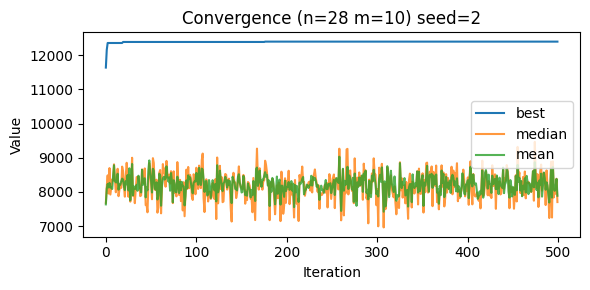


=== running seed 3
[iter 0/500] best=11590.0000 median=8490.0000 mean=7828.7500
[iter 50/500] best=12390.0000 median=8227.5000 mean=8006.5000
[iter 100/500] best=12390.0000 median=8742.5000 mean=8150.0833
[iter 150/500] best=12390.0000 median=8495.0000 mean=8445.5000
[iter 200/500] best=12390.0000 median=8025.0000 mean=8065.0000
[iter 250/500] best=12390.0000 median=8112.5000 mean=8349.0000
[iter 300/500] best=12390.0000 median=7987.5000 mean=7923.4167
[iter 350/500] best=12390.0000 median=8452.5000 mean=8246.0000
[iter 400/500] best=12390.0000 median=8297.5000 mean=8137.7500
[iter 450/500] best=12390.0000 median=8222.5000 mean=8197.6667
[iter 499/500] best=12400.0000 median=7752.5000 mean=7889.3333
Selected items: [0, 1, 2, 8, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27]
Value: 12400.0 Used per constraint: [815.0, 1204.0, 173.0, 370.0, 443.0, 469.0, 146.0, 323.0, 453.0, 490.0]


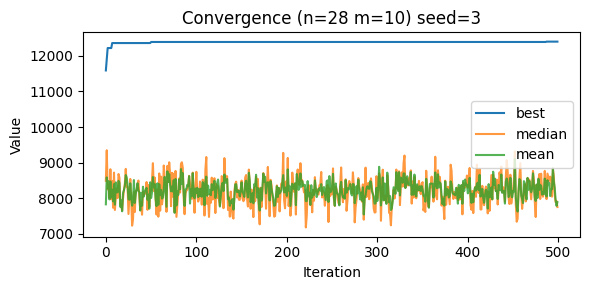


=== running seed 4
[iter 0/500] best=11240.0000 median=7820.0000 mean=7645.5000
[iter 50/500] best=12360.0000 median=8107.5000 mean=7961.9167
[iter 100/500] best=12360.0000 median=8147.5000 mean=8269.7500
[iter 150/500] best=12360.0000 median=8440.0000 mean=8440.1667
[iter 200/500] best=12360.0000 median=7820.0000 mean=8155.1667
[iter 250/500] best=12360.0000 median=7720.0000 mean=8254.9167
[iter 300/500] best=12360.0000 median=7800.0000 mean=8086.4167
[iter 350/500] best=12360.0000 median=7485.0000 mean=7889.8333
[iter 400/500] best=12390.0000 median=7545.0000 mean=7971.0833
[iter 450/500] best=12390.0000 median=7972.5000 mean=7998.7500
[iter 499/500] best=12390.0000 median=7472.5000 mean=7700.9167
Selected items: [0, 1, 2, 8, 13, 14, 16, 19, 20, 21, 22, 23, 24, 25, 26, 27]
Value: 12390.0 Used per constraint: [826.0, 1198.0, 170.0, 384.0, 472.0, 492.0, 156.0, 333.0, 454.0, 490.0]


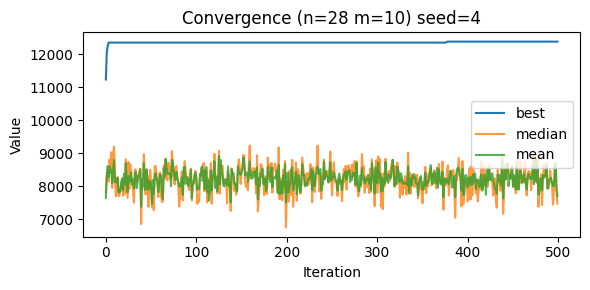


=== running seed 5
[iter 0/500] best=11250.0000 median=7827.5000 mean=7621.5833
[iter 50/500] best=12390.0000 median=8282.5000 mean=8274.4167
[iter 100/500] best=12400.0000 median=8242.5000 mean=8277.3333
[iter 150/500] best=12400.0000 median=7455.0000 mean=8008.0000
[iter 200/500] best=12400.0000 median=8595.0000 mean=8451.5000
[iter 250/500] best=12400.0000 median=8697.5000 mean=8469.7500
[iter 300/500] best=12400.0000 median=7935.0000 mean=7979.4167
[iter 350/500] best=12400.0000 median=8710.0000 mean=8344.0000
[iter 400/500] best=12400.0000 median=8352.5000 mean=8355.8333
[iter 450/500] best=12400.0000 median=8502.5000 mean=8504.5833
[iter 499/500] best=12400.0000 median=8210.0000 mean=8221.5833
Selected items: [0, 1, 2, 8, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27]
Value: 12400.0 Used per constraint: [815.0, 1204.0, 173.0, 370.0, 443.0, 469.0, 146.0, 323.0, 453.0, 490.0]


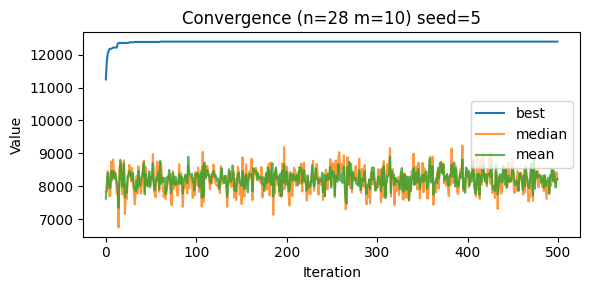


=== running seed 6
[iter 0/500] best=11470.0000 median=7545.0000 mean=7449.3333
[iter 50/500] best=12400.0000 median=7895.0000 mean=7542.8333
[iter 100/500] best=12400.0000 median=8220.0000 mean=8401.1667
[iter 150/500] best=12400.0000 median=8192.5000 mean=8246.9167
[iter 200/500] best=12400.0000 median=8675.0000 mean=8384.5833
[iter 250/500] best=12400.0000 median=8442.5000 mean=8098.1667
[iter 300/500] best=12400.0000 median=8395.0000 mean=8468.2500
[iter 350/500] best=12400.0000 median=8032.5000 mean=8033.7500
[iter 400/500] best=12400.0000 median=8697.5000 mean=8147.5000
[iter 450/500] best=12400.0000 median=8947.5000 mean=8594.2500
[iter 499/500] best=12400.0000 median=8587.5000 mean=8351.6667
Selected items: [0, 1, 2, 8, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27]
Value: 12400.0 Used per constraint: [815.0, 1204.0, 173.0, 370.0, 443.0, 469.0, 146.0, 323.0, 453.0, 490.0]


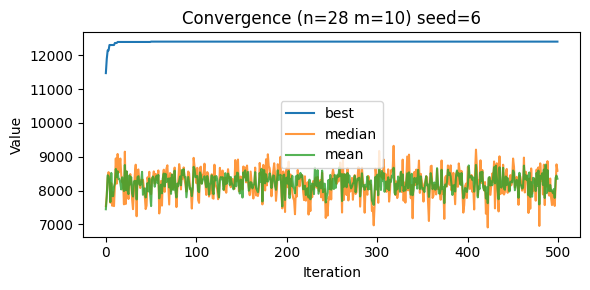


=== running seed 7
[iter 0/500] best=11420.0000 median=7807.5000 mean=7454.9167
[iter 50/500] best=12390.0000 median=7350.0000 mean=7928.1667
[iter 100/500] best=12390.0000 median=8467.5000 mean=8260.5000
[iter 150/500] best=12390.0000 median=8185.0000 mean=8299.7500
[iter 200/500] best=12400.0000 median=8067.5000 mean=8253.9167
[iter 250/500] best=12400.0000 median=8535.0000 mean=8337.0833
[iter 300/500] best=12400.0000 median=8067.5000 mean=8196.2500
[iter 350/500] best=12400.0000 median=8550.0000 mean=8439.1667
[iter 400/500] best=12400.0000 median=8002.5000 mean=8241.5000
[iter 450/500] best=12400.0000 median=8155.0000 mean=8065.0000
[iter 499/500] best=12400.0000 median=7885.0000 mean=8038.3333
Selected items: [0, 1, 2, 8, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27]
Value: 12400.0 Used per constraint: [815.0, 1204.0, 173.0, 370.0, 443.0, 469.0, 146.0, 323.0, 453.0, 490.0]


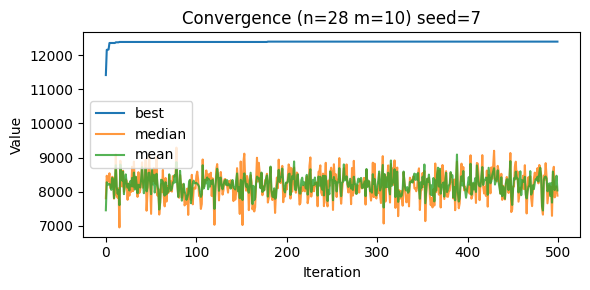


=== running seed 8
[iter 0/500] best=10845.0000 median=7482.5000 mean=7361.3333
[iter 50/500] best=12380.0000 median=8110.0000 mean=8148.5833
[iter 100/500] best=12390.0000 median=8845.0000 mean=8615.3333
[iter 150/500] best=12390.0000 median=7900.0000 mean=8085.9167
[iter 200/500] best=12390.0000 median=8237.5000 mean=8334.4167
[iter 250/500] best=12390.0000 median=8645.0000 mean=8595.6667
[iter 300/500] best=12390.0000 median=8115.0000 mean=8119.0000
[iter 350/500] best=12390.0000 median=8167.5000 mean=7927.9167
[iter 400/500] best=12400.0000 median=7880.0000 mean=8030.7500
[iter 450/500] best=12400.0000 median=8060.0000 mean=8181.9167
[iter 499/500] best=12400.0000 median=8550.0000 mean=8655.6667
Selected items: [0, 1, 2, 8, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27]
Value: 12400.0 Used per constraint: [815.0, 1204.0, 173.0, 370.0, 443.0, 469.0, 146.0, 323.0, 453.0, 490.0]


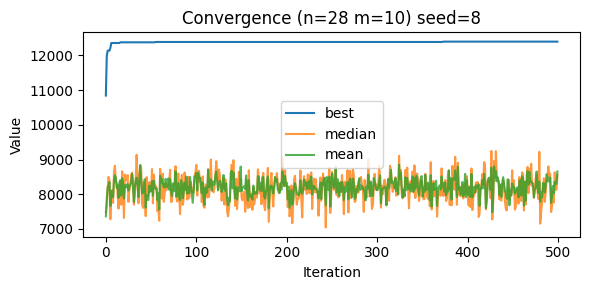


=== running seed 9
[iter 0/500] best=11370.0000 median=7965.0000 mean=7417.0833
[iter 50/500] best=12360.0000 median=8020.0000 mean=8192.1667
[iter 100/500] best=12390.0000 median=8917.5000 mean=8506.5000
[iter 150/500] best=12390.0000 median=8100.0000 mean=8162.7500
[iter 200/500] best=12400.0000 median=8670.0000 mean=8532.9167
[iter 250/500] best=12400.0000 median=8147.5000 mean=8028.5000
[iter 300/500] best=12400.0000 median=8182.5000 mean=8179.3333
[iter 350/500] best=12400.0000 median=7790.0000 mean=8094.0833
[iter 400/500] best=12400.0000 median=9227.5000 mean=8736.2500
[iter 450/500] best=12400.0000 median=8242.5000 mean=8365.7500
[iter 499/500] best=12400.0000 median=8932.5000 mean=8413.0833
Selected items: [0, 1, 2, 8, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27]
Value: 12400.0 Used per constraint: [815.0, 1204.0, 173.0, 370.0, 443.0, 469.0, 146.0, 323.0, 453.0, 490.0]


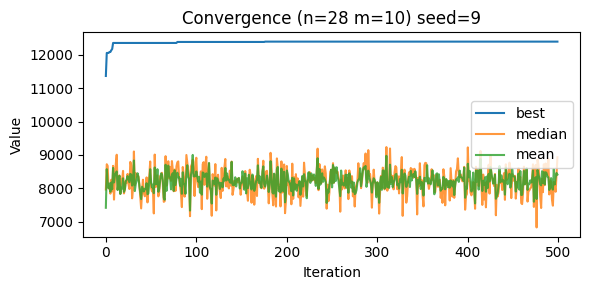



########## Instance 5  n= 39  m= 5  opt= 10618

=== running seed 0
[iter 0/500] best=9610.0000 median=7428.5000 mean=6722.7667
[iter 50/500] best=10527.0000 median=7485.0000 mean=7334.9500
[iter 100/500] best=10547.0000 median=7485.0000 mean=7323.6333
[iter 150/500] best=10549.0000 median=7485.0000 mean=7334.2000
[iter 200/500] best=10549.0000 median=8080.5000 mean=7593.0833
[iter 250/500] best=10549.0000 median=7467.5000 mean=7144.5500
[iter 300/500] best=10588.0000 median=6492.5000 mean=6772.4167
[iter 350/500] best=10588.0000 median=7334.5000 mean=7142.2333
[iter 400/500] best=10588.0000 median=7485.0000 mean=7350.4500
[iter 450/500] best=10588.0000 median=7762.0000 mean=7517.5000
[iter 499/500] best=10588.0000 median=7485.0000 mean=7387.8000
Selected items: [0, 3, 5, 6, 7, 8, 10, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38]
Value: 10588.0 Used per constraint: [598.0, 494.0, 493.0, 416.0, 599.0]


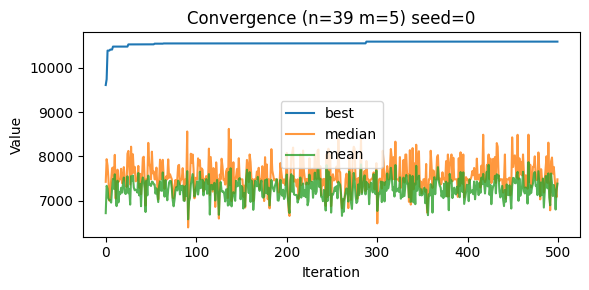


=== running seed 1
[iter 0/500] best=9554.0000 median=7470.5000 mean=7069.5833
[iter 50/500] best=10566.0000 median=6783.0000 mean=6918.0500
[iter 100/500] best=10586.0000 median=7814.5000 mean=7530.6167
[iter 150/500] best=10586.0000 median=7974.5000 mean=7697.7333
[iter 200/500] best=10586.0000 median=7645.5000 mean=7405.4833
[iter 250/500] best=10586.0000 median=8050.0000 mean=7607.1000
[iter 300/500] best=10588.0000 median=7485.0000 mean=7262.1667
[iter 350/500] best=10588.0000 median=7462.0000 mean=7076.1500
[iter 400/500] best=10604.0000 median=6529.5000 mean=6725.7833
[iter 450/500] best=10604.0000 median=7485.0000 mean=7168.8167
[iter 499/500] best=10604.0000 median=7485.0000 mean=7026.6833
Selected items: [0, 3, 5, 6, 7, 8, 10, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 36, 37, 38]
Value: 10604.0 Used per constraint: [598.0, 495.0, 498.0, 418.0, 600.0]


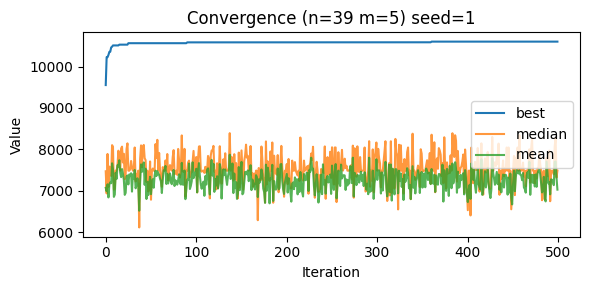


=== running seed 2
[iter 0/500] best=9638.0000 median=6779.5000 mean=6638.7500
[iter 50/500] best=10587.0000 median=8045.0000 mean=7353.3667
[iter 100/500] best=10605.0000 median=7485.0000 mean=7316.9833
[iter 150/500] best=10605.0000 median=8005.0000 mean=7509.7333
[iter 200/500] best=10605.0000 median=7485.0000 mean=7284.0833
[iter 250/500] best=10605.0000 median=7485.0000 mean=7223.4000
[iter 300/500] best=10605.0000 median=7712.0000 mean=7568.4833
[iter 350/500] best=10605.0000 median=6329.5000 mean=6762.7667
[iter 400/500] best=10605.0000 median=7638.0000 mean=7223.7500
[iter 450/500] best=10605.0000 median=7485.0000 mean=7238.2333
[iter 499/500] best=10605.0000 median=7485.0000 mean=6957.9333
Selected items: [0, 1, 3, 5, 7, 8, 10, 12, 13, 14, 15, 16, 17, 18, 22, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38]
Value: 10605.0 Used per constraint: [597.0, 495.0, 489.0, 423.0, 600.0]


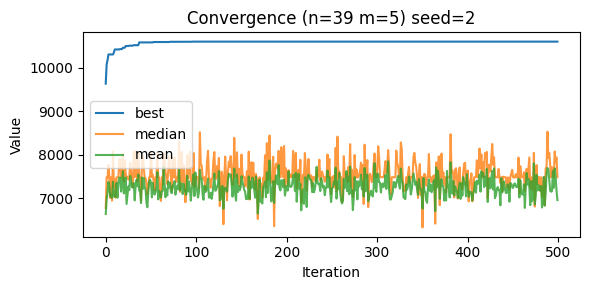


=== running seed 3
[iter 0/500] best=9569.0000 median=7049.0000 mean=6646.1167
[iter 50/500] best=10601.0000 median=7519.5000 mean=7445.4667
[iter 100/500] best=10605.0000 median=7245.5000 mean=7367.9500
[iter 150/500] best=10618.0000 median=6886.0000 mean=6700.6500
[iter 200/500] best=10618.0000 median=7020.0000 mean=7112.2667
[iter 250/500] best=10618.0000 median=7485.0000 mean=7193.0333
[iter 300/500] best=10618.0000 median=8055.5000 mean=7535.5667
[iter 350/500] best=10618.0000 median=7158.0000 mean=7138.9500
[iter 400/500] best=10618.0000 median=7810.0000 mean=7373.2833
[iter 450/500] best=10618.0000 median=7979.0000 mean=7538.7500
[iter 499/500] best=10618.0000 median=7436.0000 mean=7189.9833
Selected items: [0, 1, 3, 5, 7, 8, 10, 12, 14, 15, 16, 17, 18, 19, 22, 24, 26, 27, 28, 30, 31, 33, 34, 35, 36, 37, 38]
Value: 10618.0 Used per constraint: [597.0, 496.0, 493.0, 427.0, 600.0]


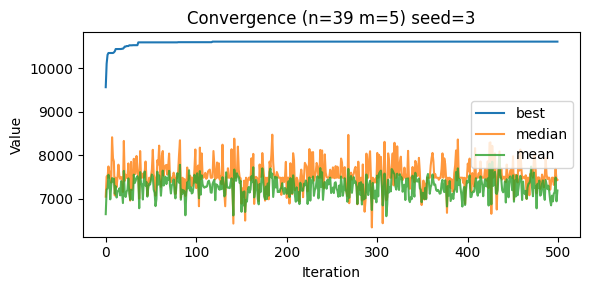


=== running seed 4
[iter 0/500] best=9543.0000 median=6523.0000 mean=6312.6500
[iter 50/500] best=10551.0000 median=7727.0000 mean=7573.6000
[iter 100/500] best=10565.0000 median=7314.5000 mean=6879.0167
[iter 150/500] best=10581.0000 median=7529.0000 mean=7419.1667
[iter 200/500] best=10581.0000 median=7485.0000 mean=7140.8500
[iter 250/500] best=10581.0000 median=8219.0000 mean=7622.8000
[iter 300/500] best=10581.0000 median=6863.0000 mean=6913.0333
[iter 350/500] best=10581.0000 median=7485.0000 mean=7067.2833
[iter 400/500] best=10581.0000 median=7563.5000 mean=7208.4333
[iter 450/500] best=10581.0000 median=7365.0000 mean=7268.2500
[iter 499/500] best=10581.0000 median=7485.0000 mean=7215.5833
Selected items: [0, 1, 3, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16, 18, 22, 24, 26, 27, 28, 30, 31, 34, 36, 37, 38]
Value: 10581.0 Used per constraint: [600.0, 494.0, 487.0, 420.0, 600.0]


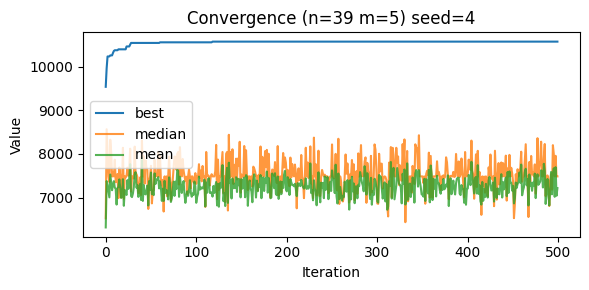


=== running seed 5
[iter 0/500] best=9562.0000 median=6842.5000 mean=6651.4667
[iter 50/500] best=10581.0000 median=7485.0000 mean=7226.2667
[iter 100/500] best=10581.0000 median=7578.0000 mean=7336.1500
[iter 150/500] best=10584.0000 median=7497.5000 mean=7059.2833
[iter 200/500] best=10588.0000 median=7485.0000 mean=7212.8667
[iter 250/500] best=10588.0000 median=7485.0000 mean=7161.0333
[iter 300/500] best=10588.0000 median=8045.0000 mean=7698.3000
[iter 350/500] best=10588.0000 median=6986.5000 mean=6885.5667
[iter 400/500] best=10588.0000 median=7440.5000 mean=7151.3167
[iter 450/500] best=10588.0000 median=7499.0000 mean=7378.4167
[iter 499/500] best=10588.0000 median=7970.0000 mean=7506.5000
Selected items: [0, 3, 5, 6, 7, 10, 12, 13, 14, 15, 16, 17, 18, 20, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38]
Value: 10588.0 Used per constraint: [600.0, 488.0, 499.0, 401.0, 597.0]


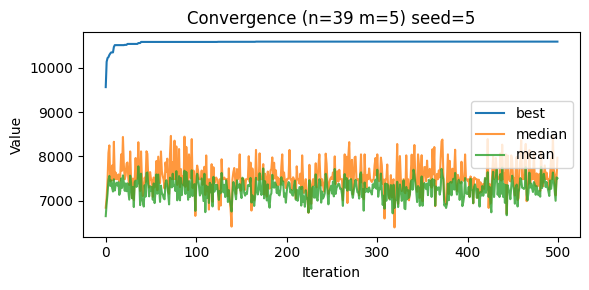


=== running seed 6
[iter 0/500] best=9492.0000 median=6851.5000 mean=6370.9833
[iter 50/500] best=10585.0000 median=8096.0000 mean=7519.5167
[iter 100/500] best=10585.0000 median=7755.0000 mean=7472.7000
[iter 150/500] best=10585.0000 median=7485.0000 mean=7279.2000
[iter 200/500] best=10585.0000 median=7485.0000 mean=7230.7500
[iter 250/500] best=10585.0000 median=7242.0000 mean=7064.3333
[iter 300/500] best=10585.0000 median=7599.0000 mean=7324.1833
[iter 350/500] best=10585.0000 median=7524.5000 mean=7375.7833
[iter 400/500] best=10585.0000 median=6835.0000 mean=6817.0000
[iter 450/500] best=10585.0000 median=7485.0000 mean=7164.6833
[iter 499/500] best=10586.0000 median=7487.5000 mean=7023.3000
Selected items: [0, 3, 5, 6, 7, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 36, 37, 38]
Value: 10586.0 Used per constraint: [600.0, 492.0, 499.0, 406.0, 595.0]


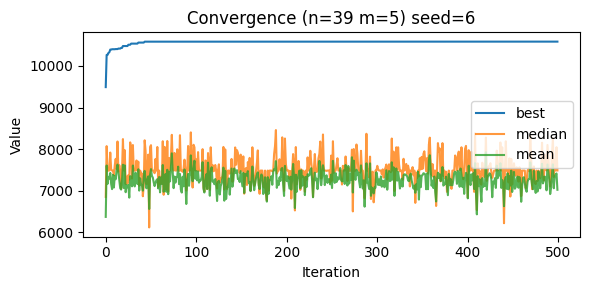


=== running seed 7
[iter 0/500] best=9233.0000 median=7058.5000 mean=6568.9000
[iter 50/500] best=10618.0000 median=6990.0000 mean=7073.8667
[iter 100/500] best=10618.0000 median=8052.5000 mean=7297.5000
[iter 150/500] best=10618.0000 median=7836.0000 mean=7531.3667
[iter 200/500] best=10618.0000 median=8089.5000 mean=7621.0000
[iter 250/500] best=10618.0000 median=7794.5000 mean=7302.3000
[iter 300/500] best=10618.0000 median=7055.0000 mean=7031.0167
[iter 350/500] best=10618.0000 median=7675.0000 mean=7185.4000
[iter 400/500] best=10618.0000 median=7040.0000 mean=6956.3000
[iter 450/500] best=10618.0000 median=7209.5000 mean=7113.8333
[iter 499/500] best=10618.0000 median=7491.0000 mean=7395.2833
Selected items: [0, 1, 3, 5, 7, 8, 10, 12, 14, 15, 16, 17, 18, 19, 22, 24, 26, 27, 28, 30, 31, 33, 34, 35, 36, 37, 38]
Value: 10618.0 Used per constraint: [597.0, 496.0, 493.0, 427.0, 600.0]


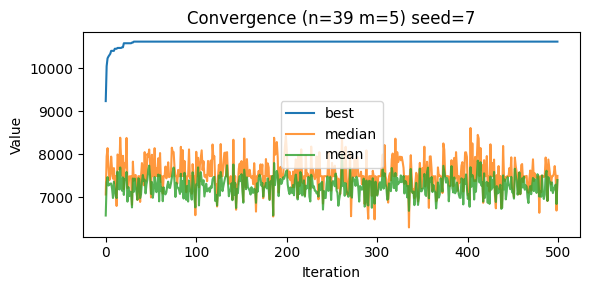


=== running seed 8
[iter 0/500] best=9710.0000 median=7194.5000 mean=6678.3000
[iter 50/500] best=10531.0000 median=7255.0000 mean=7056.0333
[iter 100/500] best=10588.0000 median=7519.5000 mean=7233.9333
[iter 150/500] best=10588.0000 median=7190.5000 mean=6999.5333
[iter 200/500] best=10588.0000 median=6980.0000 mean=6721.0500
[iter 250/500] best=10588.0000 median=7036.0000 mean=6946.9500
[iter 300/500] best=10588.0000 median=7968.0000 mean=7653.0167
[iter 350/500] best=10588.0000 median=7428.5000 mean=7056.3667
[iter 400/500] best=10588.0000 median=7431.5000 mean=7234.1667
[iter 450/500] best=10588.0000 median=7485.0000 mean=7353.8000
[iter 499/500] best=10588.0000 median=7000.0000 mean=7060.4833
Selected items: [0, 3, 5, 7, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38]
Value: 10588.0 Used per constraint: [600.0, 490.0, 500.0, 410.0, 596.0]


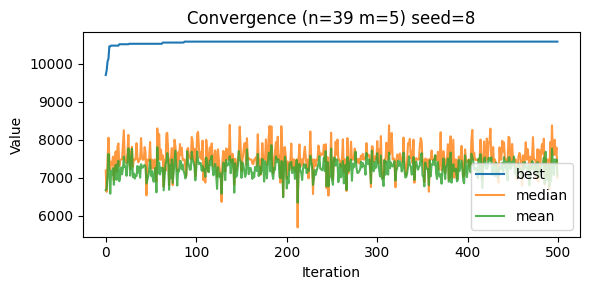


=== running seed 9
[iter 0/500] best=9747.0000 median=7310.0000 mean=6880.2500
[iter 50/500] best=10539.0000 median=7485.0000 mean=7184.3667
[iter 100/500] best=10618.0000 median=8133.0000 mean=7485.5333
[iter 150/500] best=10618.0000 median=7485.0000 mean=7254.9833
[iter 200/500] best=10618.0000 median=7485.0000 mean=7389.9167
[iter 250/500] best=10618.0000 median=7315.0000 mean=7067.8167
[iter 300/500] best=10618.0000 median=7396.5000 mean=7121.5833
[iter 350/500] best=10618.0000 median=7699.5000 mean=7665.6167
[iter 400/500] best=10618.0000 median=7289.5000 mean=7178.8333
[iter 450/500] best=10618.0000 median=7427.5000 mean=7112.3500
[iter 499/500] best=10618.0000 median=8133.0000 mean=7639.9500
Selected items: [0, 1, 3, 5, 7, 8, 10, 12, 14, 15, 16, 17, 18, 19, 22, 24, 26, 27, 28, 30, 31, 33, 34, 35, 36, 37, 38]
Value: 10618.0 Used per constraint: [597.0, 496.0, 493.0, 427.0, 600.0]


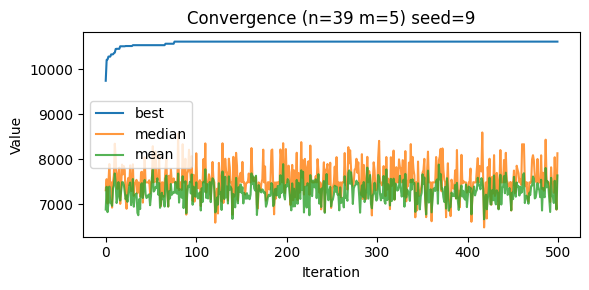

instance_n   m  seed  best_value  \
0            6  10     0      3800.0   
1            6  10     1      3800.0   
2            6  10     2      3800.0   
3            6  10     3      3800.0   
4            6  10     4      3800.0   
5            6  10     5      3800.0   
6            6  10     6      3800.0   
7            6  10     7      3800.0   
8            6  10     8      3800.0   
9            6  10     9      3800.0   
10          10  10     0      8706.1   
11          10  10     1      8706.1   
12          10  10     2      8706.1   
13          10  10     3      8706.1   
14          10  10     4      8706.1   
15          10  10     5      8706.1   
16          10  10     6      8706.1   
17          10  10     7      8706.1   
18          10  10     8      8706.1   
19          10  10     9      8706.1   
20          15  10     0      4015.0   
21          15  10     1      4015.0   
22          15  10     2      4015.0   
23          15  10     3      4015.0   
24          15  10     4      4015.0   
25          15  10     5      4015.0   
26          15  10     6      4015.0   
27          15  10     7      4015.0   
28          15  10     8      4015.0   
29          15  10     9      4015.0   
30          20  10     0      6120.0   
31          20  10     1      6120.0   
32          20  10     2      6120.0   
33          20  10     3      6120.0   
34          20  10     4      6120.0   
35          20  10     5      6120.0   
36          20  10     6      6120.0   
37          20  10     7      6120.0   
38          20  10     8      6120.0   
39          20  10     9      6120.0   
40          28  10     0     12400.0   
41          28  10     1     12400.0   
42          28  10     2     12400.0   
43          28  10     3     12400.0   
44          28  10     4     12390.0   
45          28  10     5     12400.0   
46          28  10     6     12400.0   
47          28  10     7     12400.0   
48          28  10     8     12400.0   
49          28  10     9     12400.0   
50          39   5     0     10588.0   
51          39   5     1     10604.0   
52          39   5     2     10605.0   
53          39   5     3     10618.0   
54          39   5     4     10581.0   
55          39   5     5     10588.0   
56          39   5     6     10586.0   
57          39   5     7     10618.0   
58          39   5     8     10588.0   
59          39   5     9     10618.0   

                                             selected  \
0                                           [1, 2, 5]   
1                                           [1, 2, 5]   
2                                           [1, 2, 5]   
3                                           [1, 2, 5]   
4                                           [1, 2, 5]   
5                                           [1, 2, 5]   
6                                           [1, 2, 5]   
7                                           [1, 2, 5]   
8                                           [1, 2, 5]   
9                                           [1, 2, 5]   
10                                    [1, 3, 4, 7, 9]   
11                                    [1, 3, 4, 7, 9]   
12                                    [1, 3, 4, 7, 9]   
13                                    [1, 3, 4, 7, 9]   
14                                    [1, 3, 4, 7, 9]   
15                                    [1, 3, 4, 7, 9]   
16                                    [1, 3, 4, 7, 9]   
17                                    [1, 3, 4, 7, 9]   
18                                    [1, 3, 4, 7, 9]   
19                                    [1, 3, 4, 7, 9]   
20                      [0, 1, 3, 5, 6, 8, 9, 13, 14]   
21                      [0, 1, 3, 5, 6, 8, 9, 13, 14]   
22                      [0, 1, 3, 5, 6, 8, 9, 13, 14]   
23                      [0, 1, 3, 5, 6, 8, 9, 13, 14]   
24                      [0, 1, 3, 5, 6, 8, 9, 13, 14]   
25                      [0, 1, 3, 5, 6, 8, 9, 13, 14]   
26                      

In [3]:
# Paste this whole block into a Jupyter cell and run.
import re, random, time
from typing import List, Tuple
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

# =========================
# Parser for mknap style file
# =========================
def parse_mknap_file(path: str):
    """Parse an OR-Library mknap file (mknap1.txt style).
    Returns a list of instances, each a dict with keys:
      'n','m','opt','p' (list), 'R' (m x n matrix), 'b' (list)
    """
    with open(path, 'r') as f:
        text = f.read()
    # extract numbers (ints or floats)
    toks = re.findall(r'[-+]?\d*\.\d+|\d+', text)
    nums = [float(t) if '.' in t else int(t) for t in toks]
    idx = 0
    K = int(nums[idx]); idx += 1
    instances = []
    for _ in range(K):
        n = int(nums[idx]); m = int(nums[idx+1]); opt = nums[idx+2]; idx += 3
        # read profits p (n numbers)
        p = [float(nums[idx + i]) for i in range(n)]; idx += n
        # read m * n resource coefficients (row-major: each constraint is n numbers)
        R = []
        for _c in range(m):
            row = [float(nums[idx + j]) for j in range(n)]
            R.append(row)
            idx += n
        # read b (m numbers)
        b = [float(nums[idx + i]) for i in range(m)]; idx += m
        instances.append({'n': n, 'm': m, 'opt': opt, 'p': p, 'R': R, 'b': b})
    return instances

# =========================
# Feasibility / repair / value for MDKP
# =========================
def is_feasible(x: List[int], R: List[List[float]], b: List[float]) -> bool:
    m = len(R)
    for i in range(m):
        used = sum(R[i][j] * x[j] for j in range(len(x)))
        if used > b[i] + 1e-9:  # small tolerance
            return False
    return True

def repair_multidim(x: List[int], p: List[float], R: List[List[float]], b: List[float]) -> List[int]:
    """Greedy repair: while infeasible, remove selected item with smallest
    profit / normalized-resource-usage score."""
    x = x[:]  # copy
    n = len(x)
    m = len(R)
    # Convert R to columns for faster per-item access
    # But we'll just index R[i][j]
    while not is_feasible(x, R, b):
        # compute normalized load for each item: sum(R[i][j] / b[i]) (use b[i]>0)
        scores = {}
        for j in range(n):
            if x[j] == 0:
                continue
            norm_use = 0.0
            for i in range(m):
                denom = b[i] if b[i] > 0 else 1.0
                norm_use += (R[i][j] / denom)
            # score: profit per normalized resource use (lower -> better to remove)
            # add small constant to denom to avoid division by 0
            scores[j] = p[j] / (1.0 + norm_use)
        if not scores:
            break  # nothing to remove (shouldn't happen)
        # remove item with smallest score
        j_remove = min(scores.keys(), key=lambda j: scores[j])
        x[j_remove] = 0
    return x

def value_after_repair(x: List[int], p: List[float], R: List[List[float]], b: List[float]) -> float:
    x_repaired = repair_multidim(x, p, R, b)
    return sum(p[j] * x_repaired[j] for j in range(len(x_repaired))), x_repaired

# =========================
# Bees Algorithm (multidim)
# =========================
def bees_algorithm_mdkp(p: List[float], R: List[List[float]], b: List[float],
                       n: int = 50, nre: int = 3, nrb: int = 7,
                       nep: int = 8, nsp: int = 20, ngh: int = 3,
                       iters: int = 200, seed: int = 0, print_every: int = 50):
    """
    BA adapted for MDKP. Returns (best_x, best_val, curves_dict)
    curves_dict contains 'best', 'median', 'mean'.
    """
    random.seed(seed)
    n_items = len(p)
    scouts = [[random.randint(0,1) for _ in range(n_items)] for _ in range(n)]
    best_x = None
    best_val = -float('inf')
    best_curve, median_curve, mean_curve = [], [], []

    for iter_idx in range(iters):
        # evaluate population (repair each to ensure feasibility when computing 'value')
        evals = []
        for x in scouts:
            val, x_r = value_after_repair(x, p, R, b)
            evals.append((x, val, x_r))
        # sort by value descending
        evals.sort(key=lambda t: t[1], reverse=True)

        # update best
        if evals[0][1] > best_val:
            best_val = evals[0][1]
            best_x = evals[0][2]  # store repaired feasible solution
        best_curve.append(best_val)

        # population statistics (before recruitment)
        vals = [t[1] for t in evals]
        median_curve.append(float(pd.Series(vals).median()))
        mean_curve.append(float(sum(vals)/len(vals)))

        # periodic print
        if (iter_idx % print_every) == 0 or iter_idx == iters-1:
            print(f"[iter {iter_idx}/{iters}] best={best_val:.4f} median={median_curve[-1]:.4f} mean={mean_curve[-1]:.4f}")

        # select best sites
        sites = evals[:nrb]
        new_scouts = []

        for i_site, (x_orig, _, _) in enumerate(sites):
            recruits = nep if i_site < nre else nsp
            local_best = x_orig[:]
            local_best_val, _ = value_after_repair(local_best, p, R, b)
            for _ in range(recruits):
                # mutation: mostly small flips, occasional bigger jump
                y = local_best[:]
                if random.random() < 0.1:  # big jump 10%
                    flips = random.randint(1, max(1, ngh*3))
                else:
                    flips = random.randint(1, max(1, ngh))
                for _ in range(flips):
                    j = random.randrange(n_items)
                    y[j] ^= 1
                # evaluate y (repair internally)
                y_val, y_r = value_after_repair(y, p, R, b)
                if y_val > local_best_val:
                    local_best, local_best_val = y, y_val
            new_scouts.append(local_best)

        # fill rest with random scouts
        while len(new_scouts) < n:
            new_scouts.append([random.randint(0,1) for _ in range(n_items)])

        scouts = new_scouts

    curves = {'best': best_curve, 'median': median_curve, 'mean': mean_curve}
    # final ensure best_x is repaired feasible
    best_x = repair_multidim(best_x if best_x is not None else scouts[0], p, R, b)
    return best_x, best_val, curves

# =========================
# Helpers to run experiments and plot
# =========================
def run_instance_ba(instance: dict, seeds=[0,1,2,3,4,5,6,7,8,9],
                    ba_params=None, iters=500, plot=True):
    """Run BA on a single instance for given seeds, return DataFrame of bests."""
    if ba_params is None:
        ba_params = dict(n=50, nre=3, nrb=7, nep=8, nsp=20, ngh=3)
    results = []
    for s in seeds:
        print("\n=== running seed", s)
        x_best, val_best, curves = bees_algorithm_mdkp(
            p=instance['p'], R=instance['R'], b=instance['b'],
            iters=iters, seed=s, print_every=max(1, iters//10), **ba_params)
        used_per_constraint = [sum(instance['R'][i][j]*x_best[j] for j in range(instance['n'])) for i in range(instance['m'])]
        selected_items = [j for j,bit in enumerate(x_best) if bit==1]
        print("Selected items:", selected_items)
        print("Value:", val_best, "Used per constraint:", used_per_constraint)
        results.append({'instance_n': instance['n'], 'm': instance['m'], 'seed': s,
                        'best_value': val_best, 'selected': selected_items,
                        'used': used_per_constraint})
        # plot curves for this seed
        if plot:
            plt.figure(figsize=(6,3))
            plt.plot(curves['best'], label='best')
            plt.plot(curves['median'], label='median', alpha=0.8)
            plt.plot(curves['mean'], label='mean', alpha=0.8)
            plt.xlabel('Iteration'); plt.ylabel('Value')
            plt.title(f"Convergence (n={instance['n']} m={instance['m']}) seed={s}")
            plt.legend()
            plt.tight_layout()
            plt.show()

    df = pd.DataFrame(results)
    return df

# =========================
# Example: how to run on mknap1.txt
# =========================
file_path = "Knapsack instances/mknap1.txt"  # change if needed
instances = parse_mknap_file(file_path)
# run the first K instances with few seeds for quick testing:
res_all = []
for i, inst in enumerate(instances[:6]):   # change slice to pick instances you want
    print("\n\n########## Instance", i, " n=", inst['n'], " m=", inst['m'], " opt=", inst['opt'])
    df = run_instance_ba(inst, seeds=[0,1,2,3,4,5,6,7,8,9], ba_params=dict(n=60, nre=3, nrb=8, nep=12, nsp=25, ngh=5),
                         iters=500, plot=True)
    df['instance_idx'] = i
    res_all.append(df)
summary_df = pd.concat(res_all, ignore_index=True)
display(summary_df)

# Problem 5 — Q-learning on FrozenLake

Environment: 8x8 | States: 64, Actions: 4
Using algorithm: SARSA (on-policy)
Ep 1000/200000 | Last1000 avg: -0.028 | Eps: 0.905 | MaxQ: 0.10
Ep 2000/200000 | Last1000 avg: -0.024 | Eps: 0.819 | MaxQ: 0.24
Ep 3000/200000 | Last1000 avg: -0.024 | Eps: 0.741 | MaxQ: 0.24
Ep 4000/200000 | Last1000 avg: -0.017 | Eps: 0.670 | MaxQ: 0.34
Ep 5000/200000 | Last1000 avg: -0.019 | Eps: 0.607 | MaxQ: 0.25
Ep 6000/200000 | Last1000 avg: -0.016 | Eps: 0.549 | MaxQ: 0.33
Ep 7000/200000 | Last1000 avg: -0.014 | Eps: 0.497 | MaxQ: 0.38
Ep 8000/200000 | Last1000 avg: -0.014 | Eps: 0.449 | MaxQ: 0.46
Ep 9000/200000 | Last1000 avg: -0.014 | Eps: 0.407 | MaxQ: 0.32
Ep 10000/200000 | Last1000 avg: -0.013 | Eps: 0.368 | MaxQ: 0.23
Ep 11000/200000 | Last1000 avg: -0.012 | Eps: 0.333 | MaxQ: 0.29
Ep 12000/200000 | Last1000 avg: -0.010 | Eps: 0.301 | MaxQ: 0.31
Ep 13000/200000 | Last1000 avg: -0.010 | Eps: 0.273 | MaxQ: 0.38
Ep 14000/200000 | Last1000 avg: -0.010 | Eps: 0.247 | MaxQ: 0.38
Ep 15000/200000 | Last

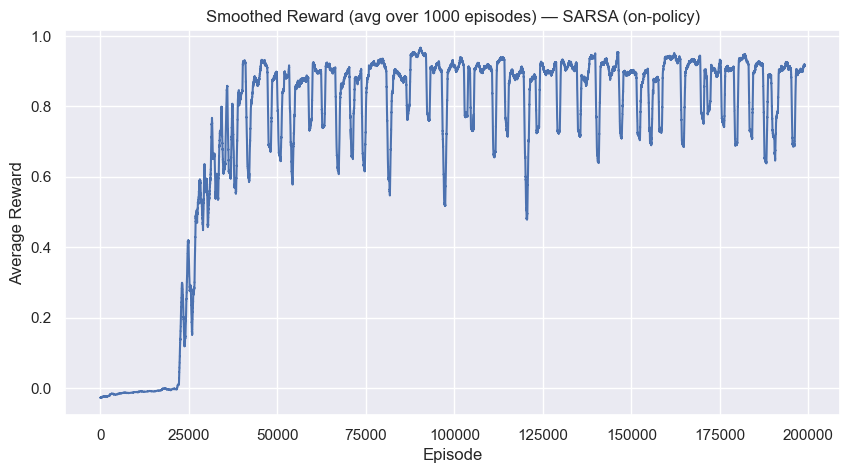

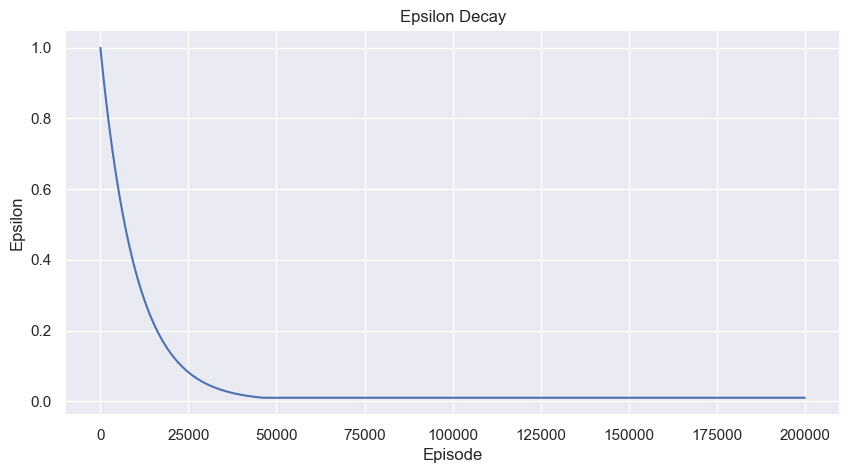


Evaluating Random Policy Baseline...
Random Policy over 200 episodes:
  Success rate: 0.0%
  Avg steps (successful episodes): 29.35


In [1]:
# --- Imports ---
import gymnasium as gym
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

# --- Configuration ---
CONFIG = {
    'env_name': 'FrozenLake-v1',
    'map_name': '8x8',             # '4x4' → Q-learning, '8x8' → SARSA
    'is_slippery': True,           # Keep True for challenge
    'alpha': 0.1,                  # Learning rate
    'gamma': 0.95,                 # Discount factor
    'epsilon': 1.0,                # Starting exploration rate
    'epsilon_min': 0.01,
    'epsilon_decay': 0.9999,       # slower decay for large maps
    'episodes': 200000,            # more episodes for 8x8
    'max_steps': 1000,              # allow more steps per episode
    'seed': 42
}

# --- Set seeds ---
np.random.seed(CONFIG['seed'])
random.seed(CONFIG['seed'])

# --- Initialize environment ---
env = gym.make(CONFIG['env_name'], map_name=CONFIG['map_name'], is_slippery=CONFIG['is_slippery'])
env.reset(seed=CONFIG['seed'])
n_states = env.observation_space.n
n_actions = env.action_space.n
print(f"Environment: {CONFIG['map_name']} | States: {n_states}, Actions: {n_actions}")

# --- Q-Learning Agent ---
class QLearningAgent:
    def __init__(self, n_states, n_actions, alpha, gamma, epsilon, epsilon_min, epsilon_decay):
        self.n_states = n_states
        self.n_actions = n_actions
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_min = epsilon_min
        self.epsilon_decay = epsilon_decay
        self.Q = np.zeros((n_states, n_actions))

    def choose_action(self, state):
        if random.random() < self.epsilon:
            return random.randint(0, self.n_actions - 1)
        return np.argmax(self.Q[state])

    def update(self, s, a, r, s_next, done):
        best_next = np.max(self.Q[s_next])
        target = r + (0 if done else self.gamma * best_next)
        self.Q[s, a] += self.alpha * (target - self.Q[s, a])

    def decay_epsilon(self):
        self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)

# --- SARSA Agent (on-policy) ---
class SARSAAgent(QLearningAgent):
    def update(self, s, a, r, s_next, done, a_next):
        target = r + (0 if done else self.gamma * self.Q[s_next, a_next])
        self.Q[s, a] += self.alpha * (target - self.Q[s, a])

# --- Select algorithm ---
if CONFIG['map_name'] == '8x8':
    agent = SARSAAgent(n_states, n_actions,
                       CONFIG['alpha'], CONFIG['gamma'],
                       CONFIG['epsilon'], CONFIG['epsilon_min'],
                       CONFIG['epsilon_decay'])
    algo_name = "SARSA (on-policy)"
else:
    agent = QLearningAgent(n_states, n_actions,
                           CONFIG['alpha'], CONFIG['gamma'],
                           CONFIG['epsilon'], CONFIG['epsilon_min'],
                           CONFIG['epsilon_decay'])
    algo_name = "Q-learning (off-policy)"

print(f"Using algorithm: {algo_name}")

# --- Training Loop ---
rewards_per_episode = []
epsilons = []

for episode in range(CONFIG['episodes']):
    state, _ = env.reset(seed=CONFIG['seed'])
    total_reward = 0

    # choose first action (SARSA needs it)
    action = agent.choose_action(state)

    for step in range(CONFIG['max_steps']):
        next_state, reward, done, truncated, _ = env.step(action)

        # Reward shaping (helps learning in 8x8)
        if CONFIG['map_name'] == '8x8' and reward == 0 and not done:
            reward = -0.001

        if isinstance(agent, SARSAAgent):
            next_action = agent.choose_action(next_state)
            agent.update(state, action, reward, next_state, done, next_action)
            action = next_action
        else:
            agent.update(state, action, reward, next_state, done)
            action = agent.choose_action(next_state)

        state = next_state
        total_reward += reward
        if done or truncated:
            break

    agent.decay_epsilon()
    rewards_per_episode.append(total_reward)
    epsilons.append(agent.epsilon)

    # --- Live feedback ---
    if (episode + 1) % 1000 == 0:
        avg = np.mean(rewards_per_episode[-1000:])
        print(f"Ep {episode + 1}/{CONFIG['episodes']} | "
              f"Last1000 avg: {avg:.3f} | "
              f"Eps: {agent.epsilon:.3f} | MaxQ: {agent.Q.max():.2f}")

print("\nTraining completed ✅")

# --- Evaluation (greedy policy) ---
n_eval_episodes = 200
successes = 0
steps_list = []

for _ in range(n_eval_episodes):
    state, _ = env.reset(seed=CONFIG['seed'])
    for step in range(CONFIG['max_steps']):
        action = np.argmax(agent.Q[state])
        next_state, reward, done, truncated, _ = env.step(action)
        state = next_state
        if done or truncated:
            if reward > 0:
                successes += 1
            steps_list.append(step + 1)
            break

success_rate = successes / n_eval_episodes
print(f"Evaluation over {n_eval_episodes} episodes ({algo_name}):")
print(f"  Success rate: {success_rate*100:.1f}%")
print(f"  Avg steps (successful episodes): {np.mean(steps_list) if steps_list else 0:.2f}")

# --- Inspect learned Q-values ---
print("\nSample Q-values (first 10 states):")
print(agent.Q[:10])

# --- Plot learning progress ---
sns.set(style="darkgrid")
window = 1000
smoothed_rewards = np.convolve(rewards_per_episode, np.ones(window)/window, mode='valid')

plt.figure(figsize=(10, 5))
plt.plot(smoothed_rewards)
plt.title(f"Smoothed Reward (avg over {window} episodes) — {algo_name}")
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(epsilons)
plt.title("Epsilon Decay")
plt.xlabel("Episode")
plt.ylabel("Epsilon")
plt.show()

# --- Random Policy Baseline Evaluation ---
print("\nEvaluating Random Policy Baseline...")

random_successes = 0
random_steps_list = []
for _ in range(n_eval_episodes):
    state, _ = env.reset(seed=CONFIG['seed'])
    for step in range(CONFIG['max_steps']):
        action = env.action_space.sample()  # purely random action
        next_state, reward, done, truncated, _ = env.step(action)
        state = next_state
        if done or truncated:
            if reward > 0:
                random_successes += 1
            random_steps_list.append(step + 1)
            break

random_success_rate = random_successes / n_eval_episodes
print(f"Random Policy over {n_eval_episodes} episodes:")
print(f"  Success rate: {random_success_rate*100:.1f}%")
print(f"  Avg steps (successful episodes): {np.mean(random_steps_list) if random_steps_list else 0:.2f}")